# Solution Graded Exercise 8: Hopfield Network model of associative memory

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex8_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# Exercise 8.1. Getting started

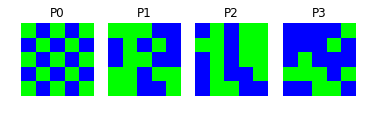

/home/fabrice/anaconda3/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


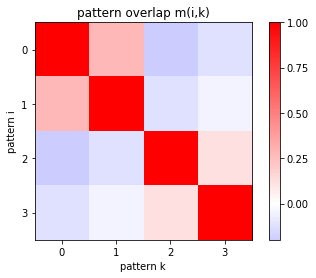

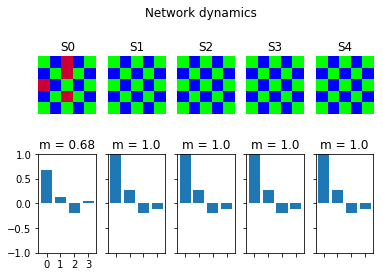

In [1]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.3. Exercise: N=4x4 Hopfield-network
## 8.3.1. Question: Storing a single pattern
#### [2 + 2 + 3 points]

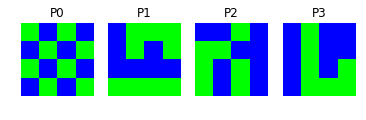

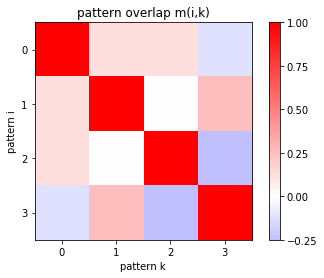

In [2]:
# write your code here 
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

In [3]:
# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network

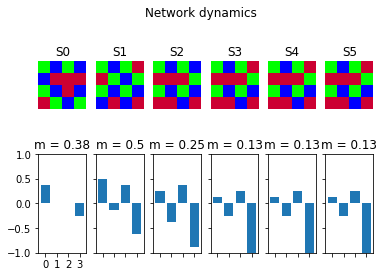

In [4]:
# Plot the sequence of network states along with the overlap of network state with the checkerboard
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

===== Iteration #0 =====


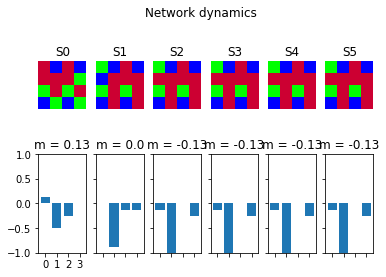

===== Iteration #1 =====


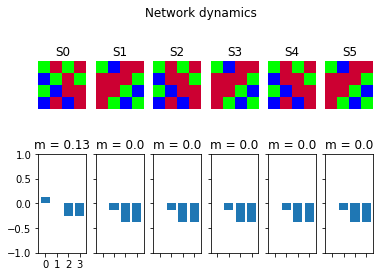

===== Iteration #2 =====


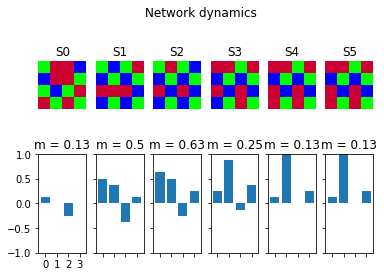

===== Iteration #3 =====


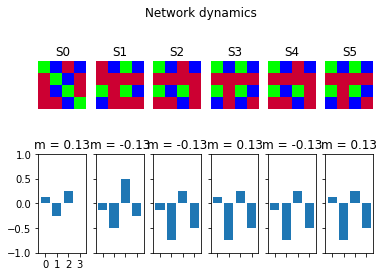

===== Iteration #4 =====


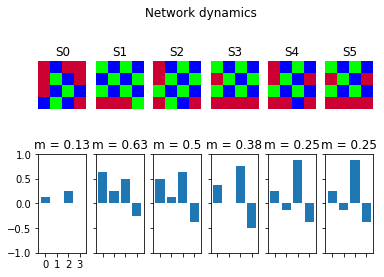

===== Iteration #5 =====


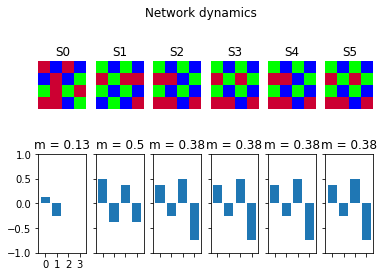

===== Iteration #6 =====


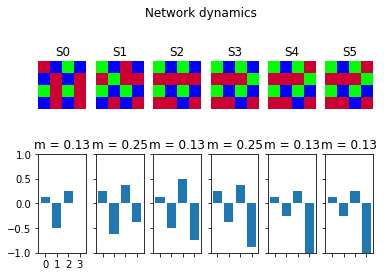

===== Iteration #7 =====


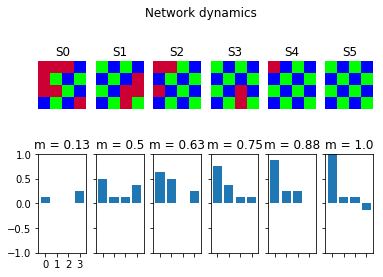

===== Iteration #8 =====


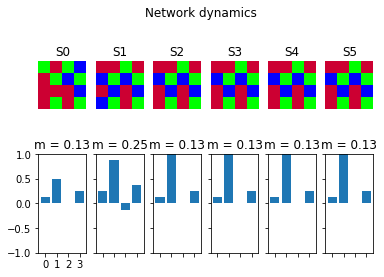

===== Iteration #9 =====


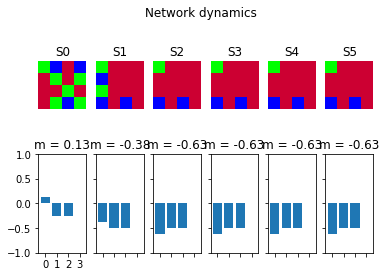

===== Iteration #10 =====


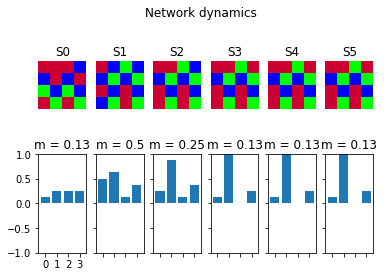

===== Iteration #11 =====


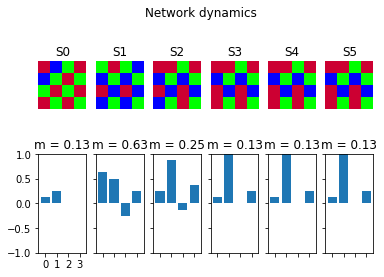

===== Iteration #12 =====


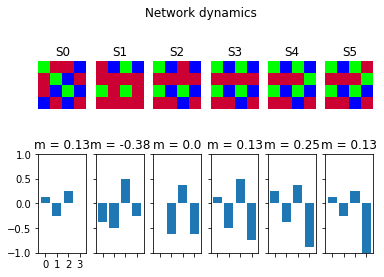

===== Iteration #13 =====


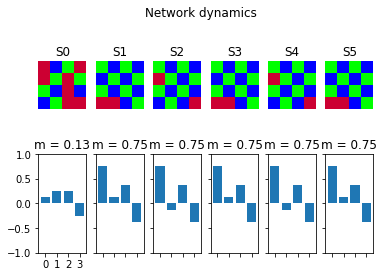

===== Iteration #14 =====


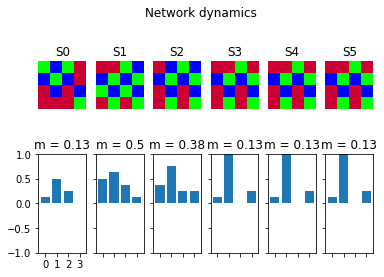

===== Iteration #15 =====


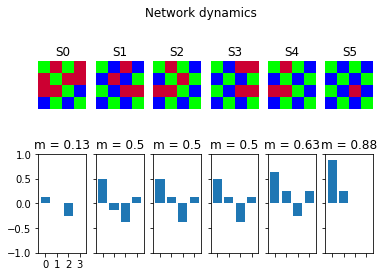

===== Iteration #16 =====


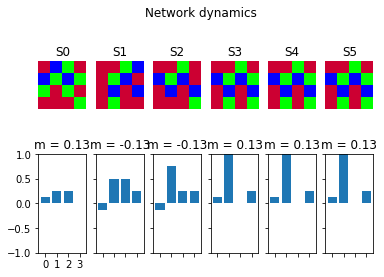

===== Iteration #17 =====


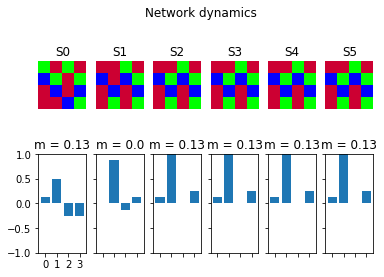

===== Iteration #18 =====


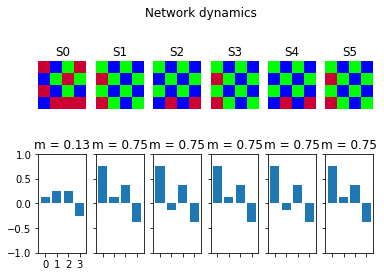

===== Iteration #19 =====


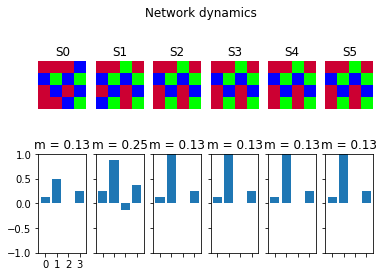

===== Iteration #20 =====


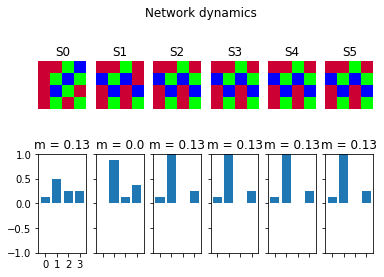

===== Iteration #21 =====


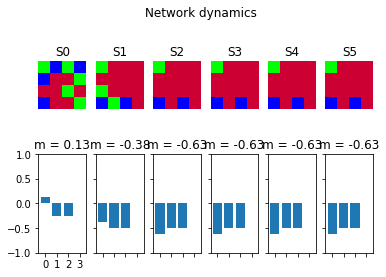

===== Iteration #22 =====


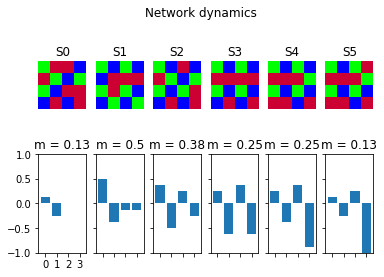

===== Iteration #23 =====


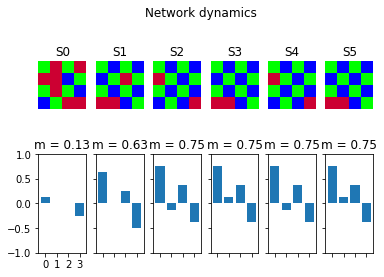

===== Iteration #24 =====


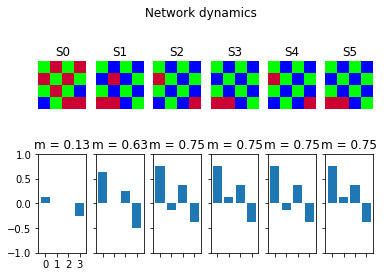

===== Iteration #25 =====


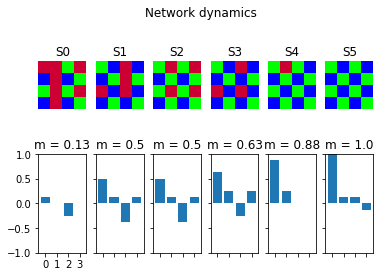

===== Iteration #26 =====


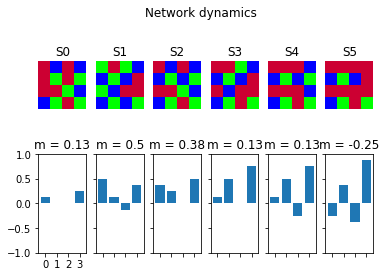

===== Iteration #27 =====


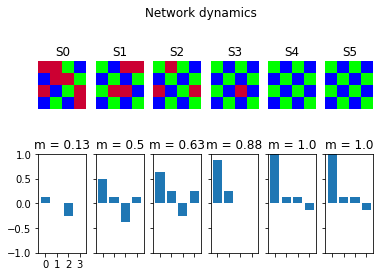

===== Iteration #28 =====


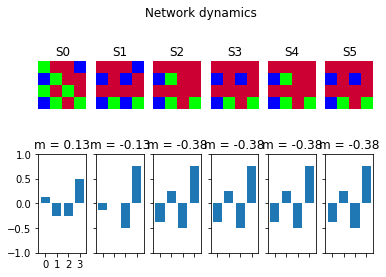

===== Iteration #29 =====


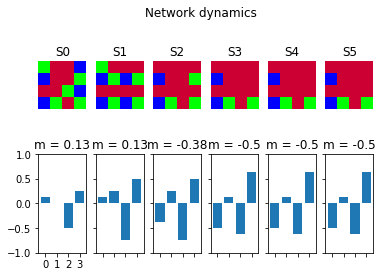

===== Iteration #30 =====


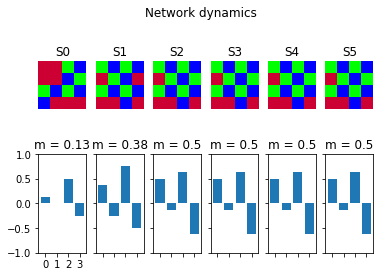

===== Iteration #31 =====


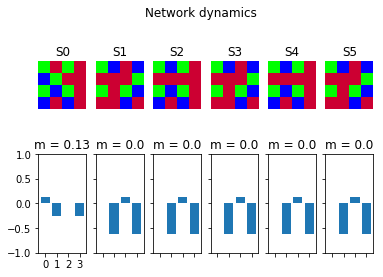

===== Iteration #32 =====


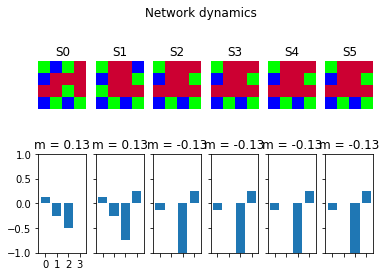

===== Iteration #33 =====


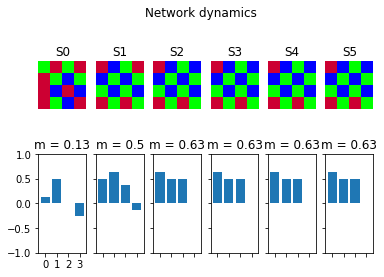

===== Iteration #34 =====


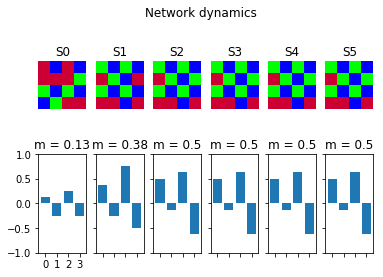

===== Iteration #35 =====


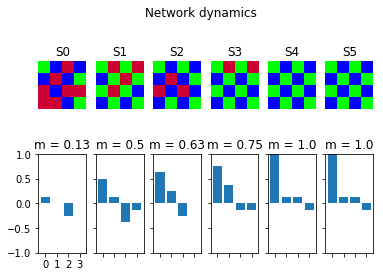

===== Iteration #36 =====


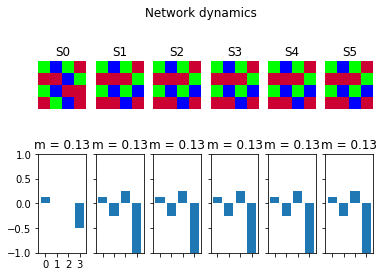

===== Iteration #37 =====


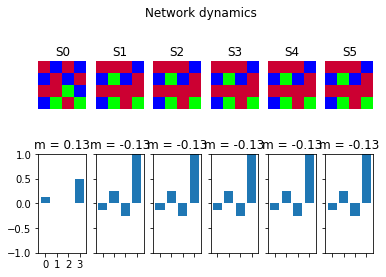

===== Iteration #38 =====


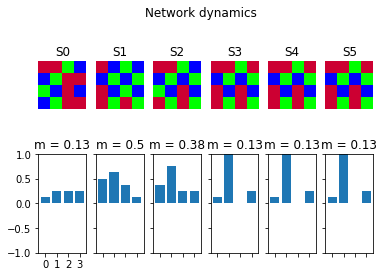

===== Iteration #39 =====


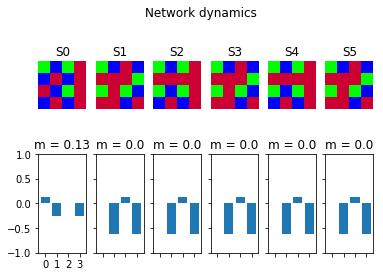

===== Iteration #40 =====


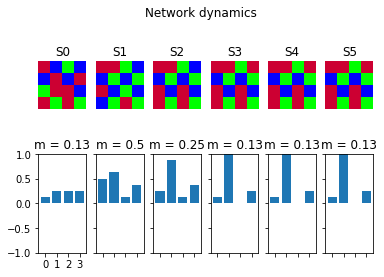

===== Iteration #41 =====


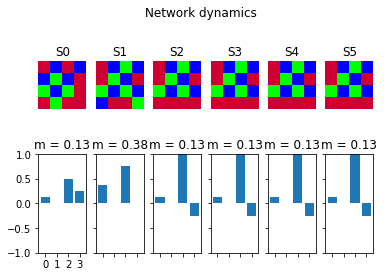

===== Iteration #42 =====


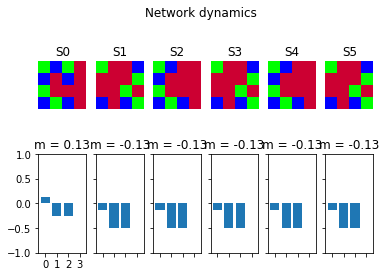

===== Iteration #43 =====


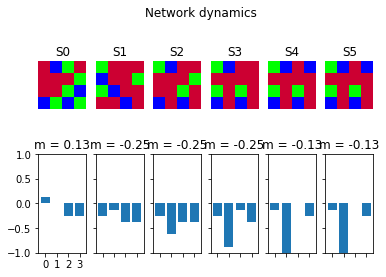

===== Iteration #44 =====


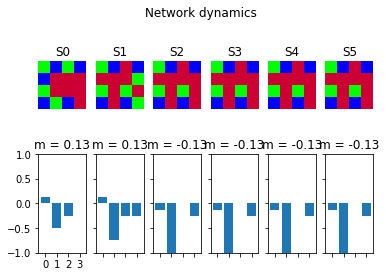

===== Iteration #45 =====


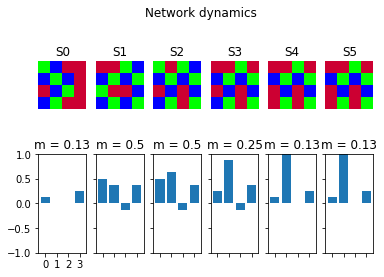

===== Iteration #46 =====


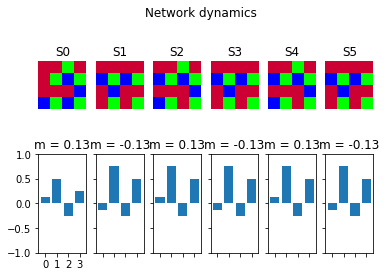

===== Iteration #47 =====


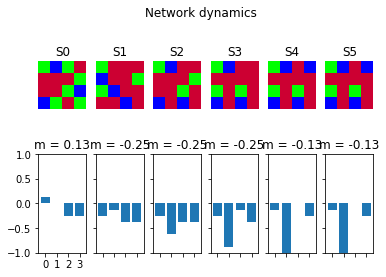

===== Iteration #48 =====


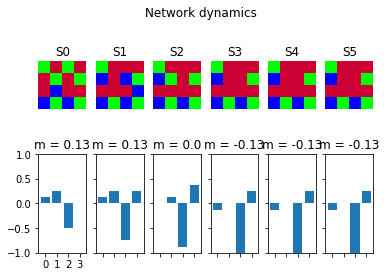

===== Iteration #49 =====


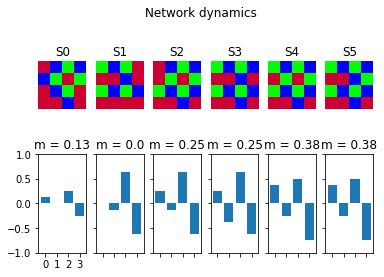

===== Iteration #50 =====


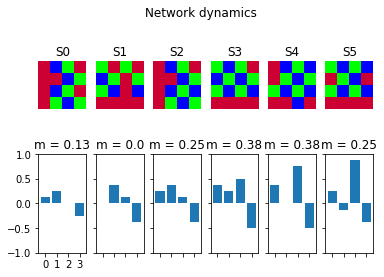

===== Iteration #51 =====


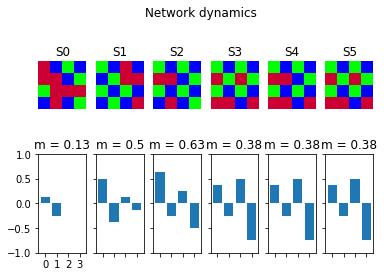

===== Iteration #52 =====


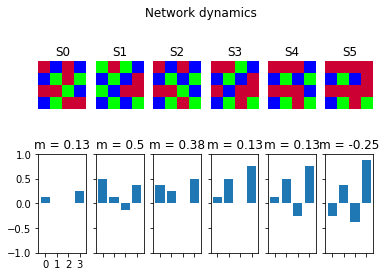

===== Iteration #53 =====


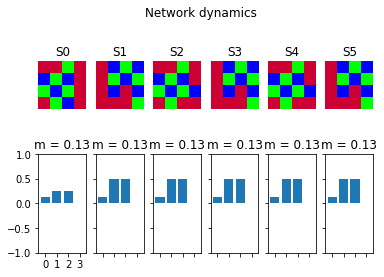

===== Iteration #54 =====


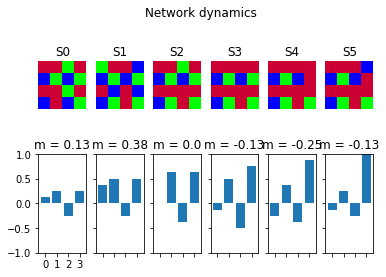

===== Iteration #55 =====


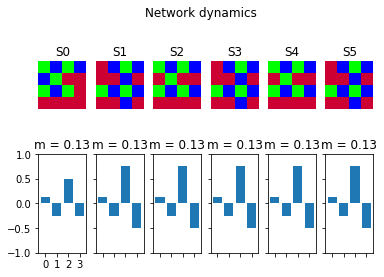

===== Iteration #56 =====


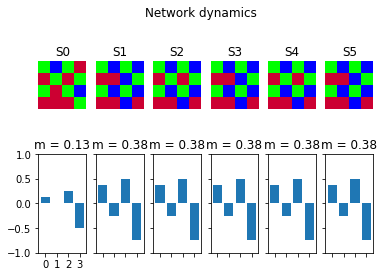

===== Iteration #57 =====


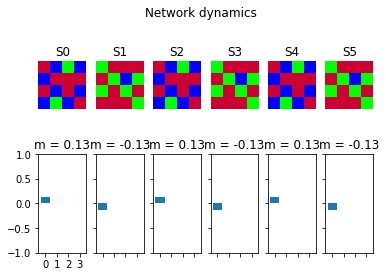

===== Iteration #58 =====


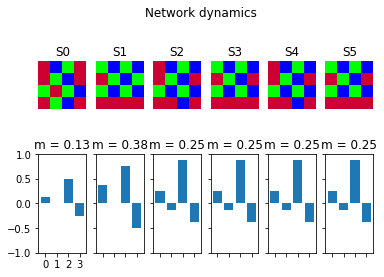

===== Iteration #59 =====


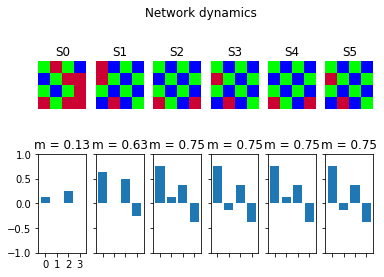

===== Iteration #60 =====


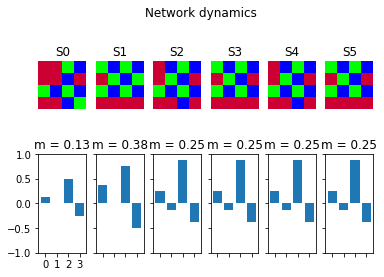

===== Iteration #61 =====


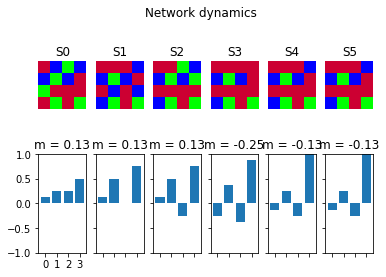

===== Iteration #62 =====


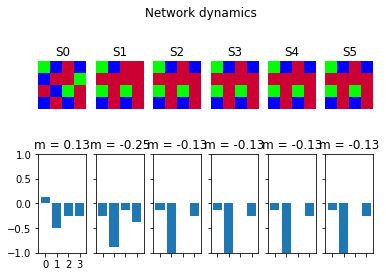

===== Iteration #63 =====


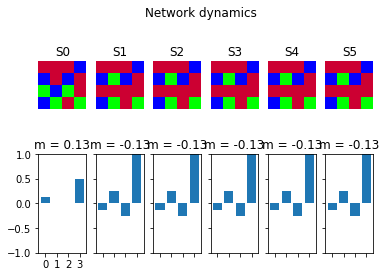

===== Iteration #64 =====


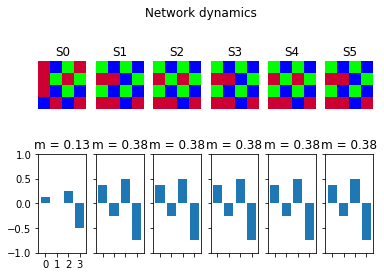

===== Iteration #65 =====


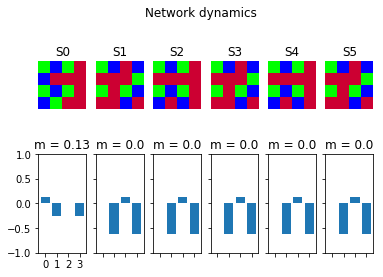

===== Iteration #66 =====


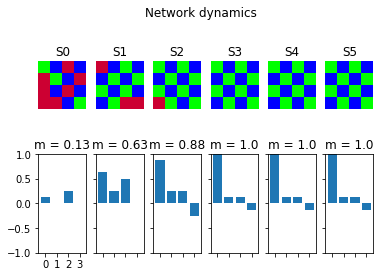

===== Iteration #67 =====


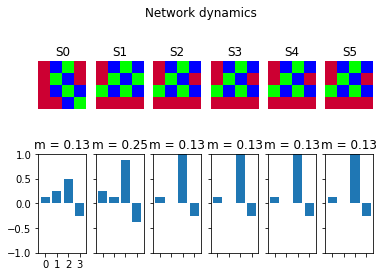

===== Iteration #68 =====


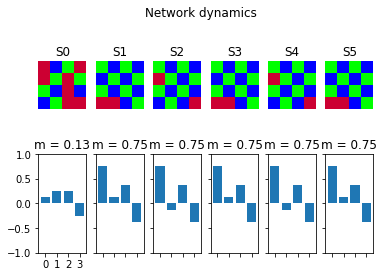

===== Iteration #69 =====


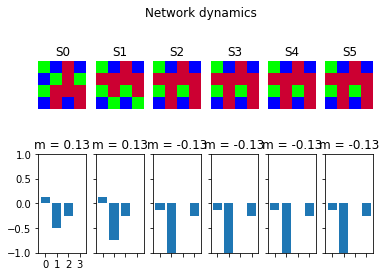

===== Iteration #70 =====


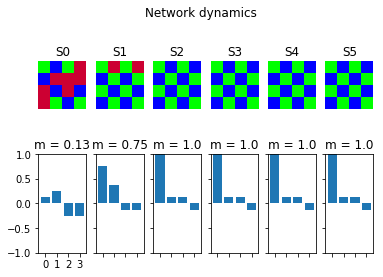

===== Iteration #71 =====


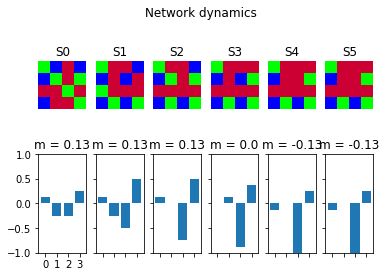

===== Iteration #72 =====


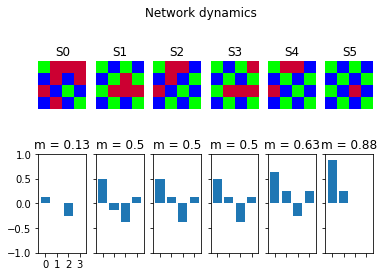

===== Iteration #73 =====


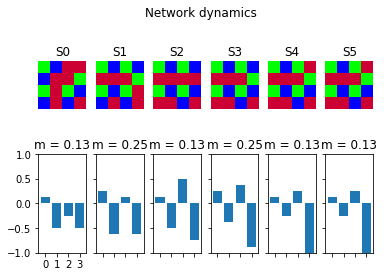

===== Iteration #74 =====


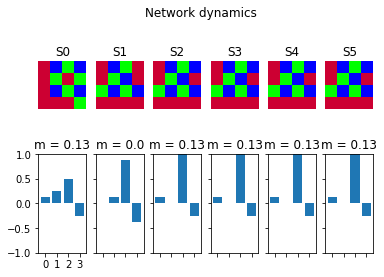

===== Iteration #75 =====


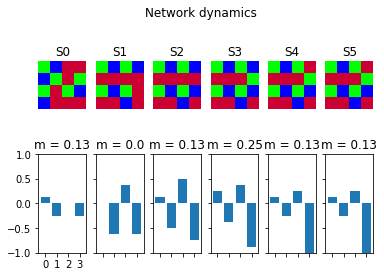

===== Iteration #76 =====


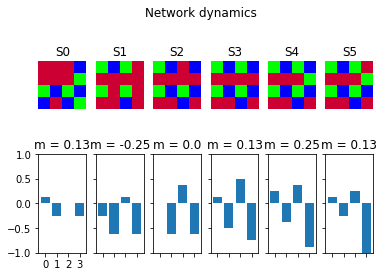

===== Iteration #77 =====


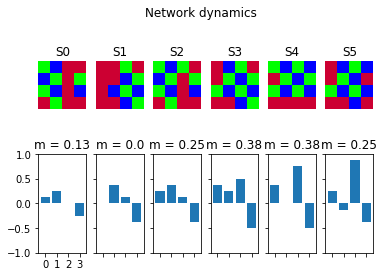

===== Iteration #78 =====


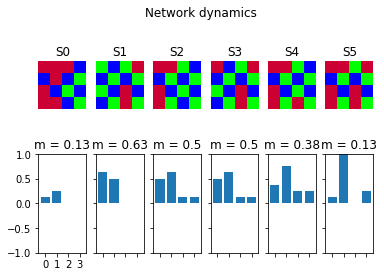

===== Iteration #79 =====


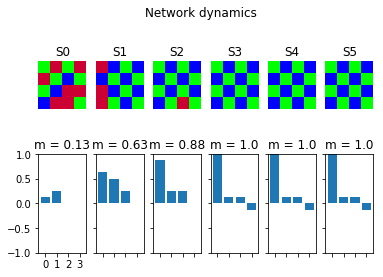

===== Iteration #80 =====


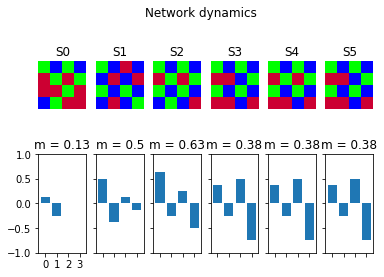

===== Iteration #81 =====


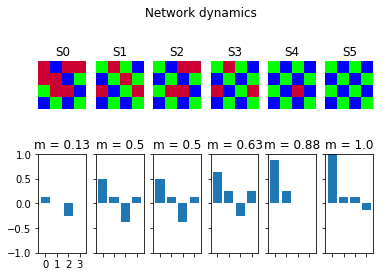

===== Iteration #82 =====


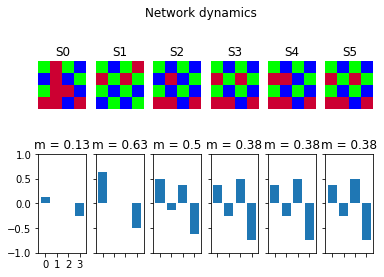

===== Iteration #83 =====


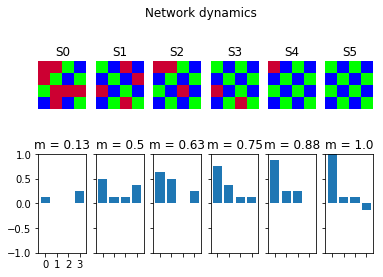

===== Iteration #84 =====


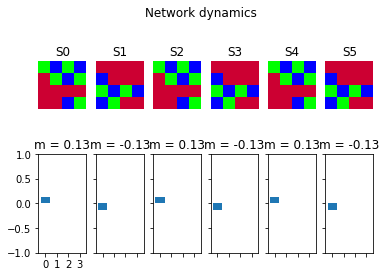

===== Iteration #85 =====


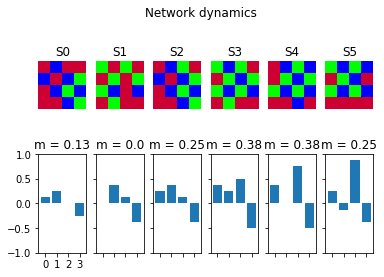

===== Iteration #86 =====


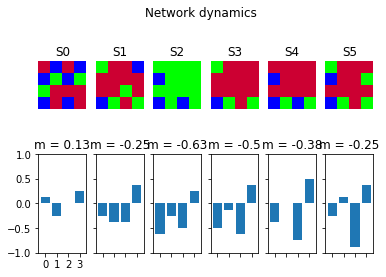

===== Iteration #87 =====


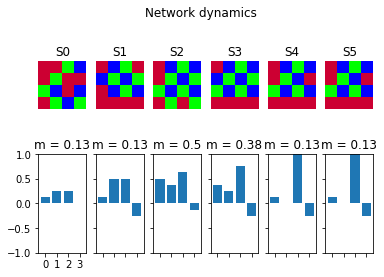

===== Iteration #88 =====


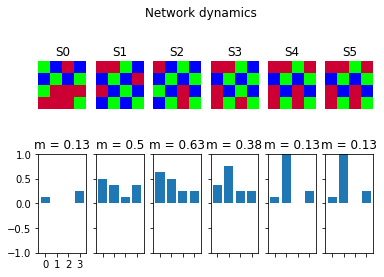

===== Iteration #89 =====


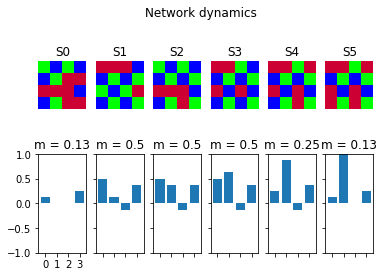

===== Iteration #90 =====


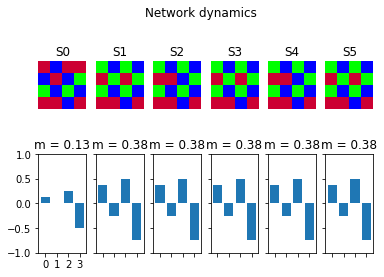

===== Iteration #91 =====


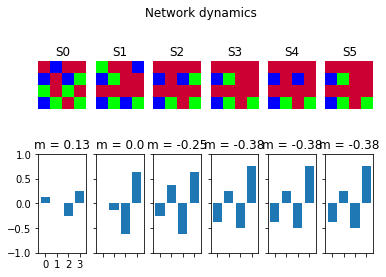

===== Iteration #92 =====


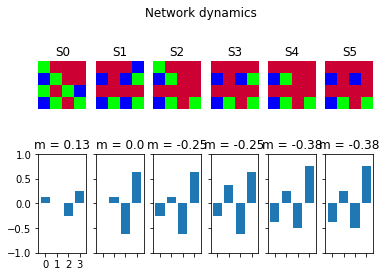

===== Iteration #93 =====


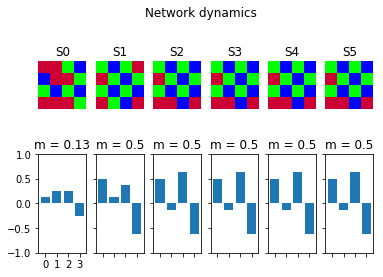

===== Iteration #94 =====


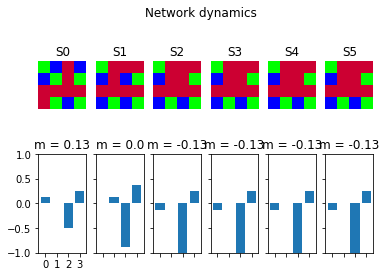

===== Iteration #95 =====


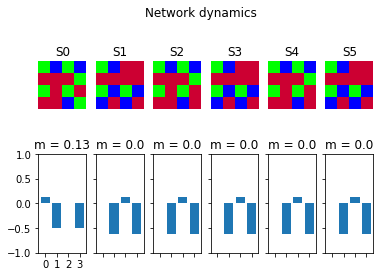

===== Iteration #96 =====


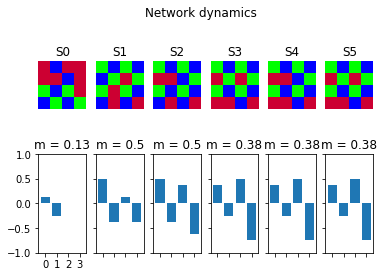

===== Iteration #97 =====


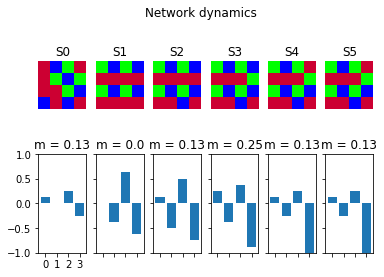

===== Iteration #98 =====


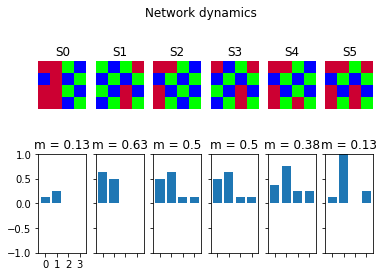

===== Iteration #99 =====


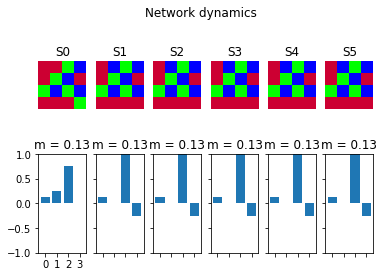

In [5]:
epochs= 100

for i in range(0,epochs):
    print("===== Iteration #{} =====".format(i))
    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=7)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=5)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    # Plot the sequence of network states along with the overlap of network state with the checkerboard
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
    print("======================")

For seven pixels, the network may retrieve the pattern. It doesn't happen quite often, but it CAN do it. At eight pixels now:

===== Iteration #0 =====


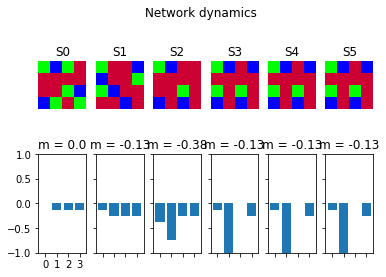

===== Iteration #1 =====


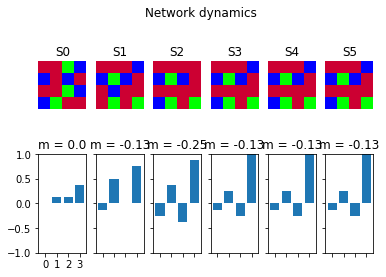

===== Iteration #2 =====


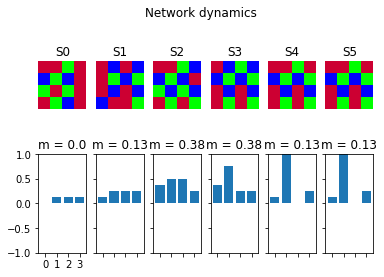

===== Iteration #3 =====


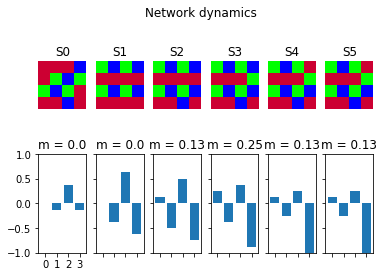

===== Iteration #4 =====


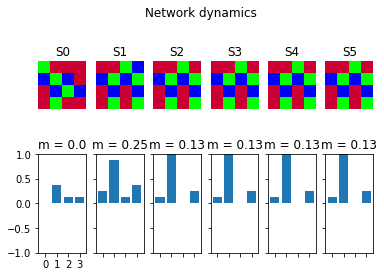

===== Iteration #5 =====


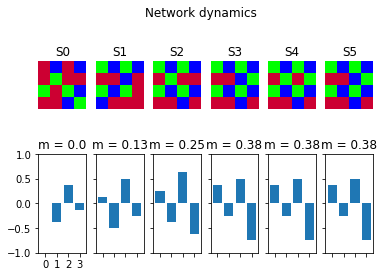

===== Iteration #6 =====


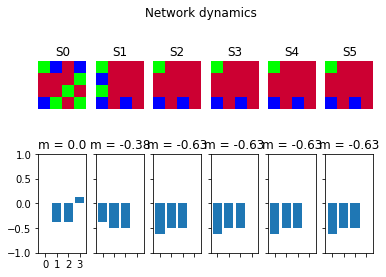

===== Iteration #7 =====


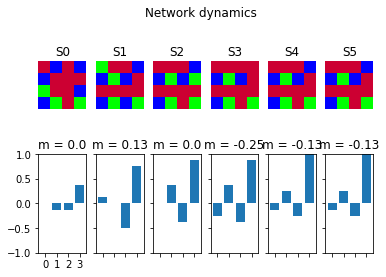

===== Iteration #8 =====


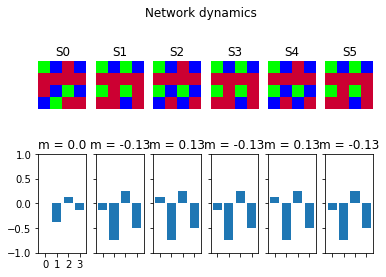

===== Iteration #9 =====


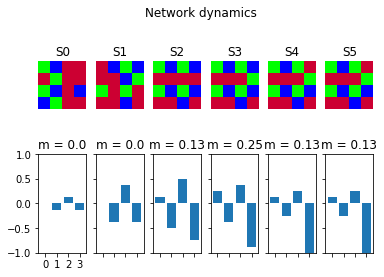

===== Iteration #10 =====


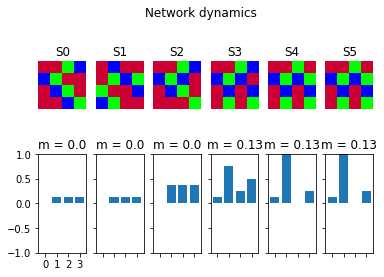

===== Iteration #11 =====


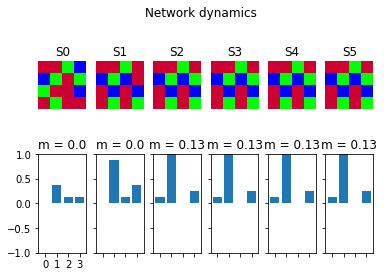

===== Iteration #12 =====


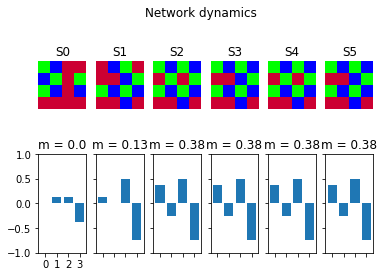

===== Iteration #13 =====


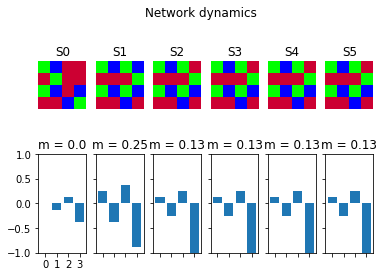

===== Iteration #14 =====


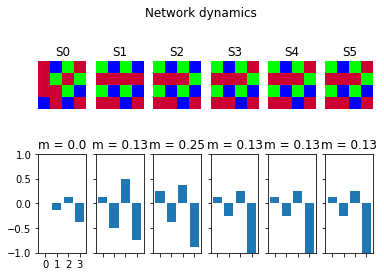

===== Iteration #15 =====


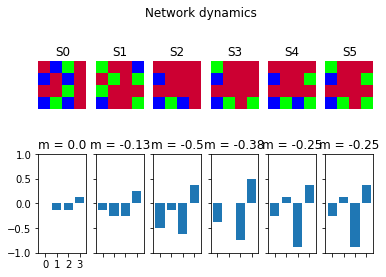

===== Iteration #16 =====


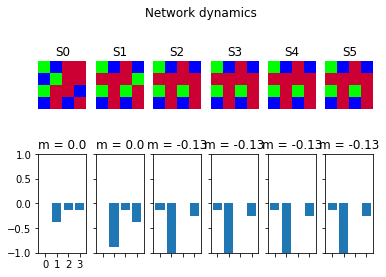

===== Iteration #17 =====


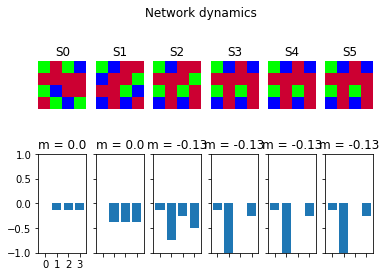

===== Iteration #18 =====


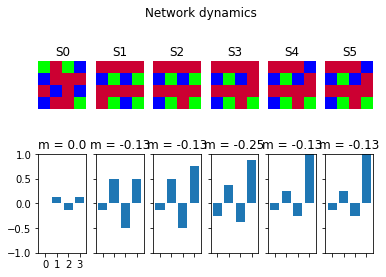

===== Iteration #19 =====


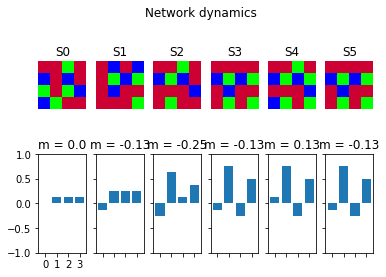

===== Iteration #20 =====


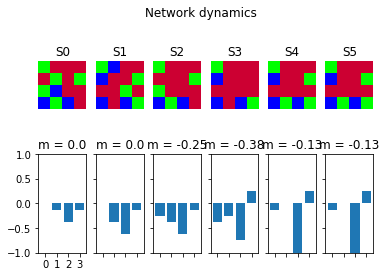

===== Iteration #21 =====


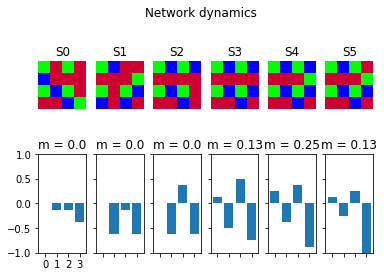

===== Iteration #22 =====


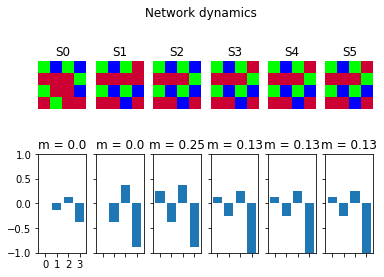

===== Iteration #23 =====


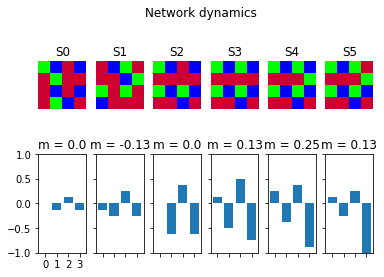

===== Iteration #24 =====


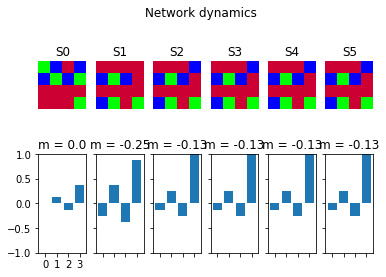

===== Iteration #25 =====


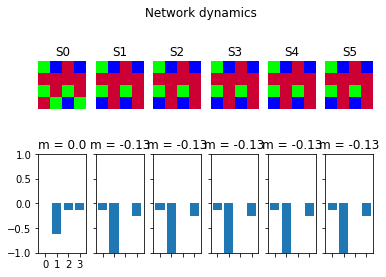

===== Iteration #26 =====


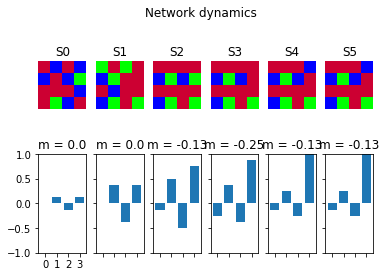

===== Iteration #27 =====


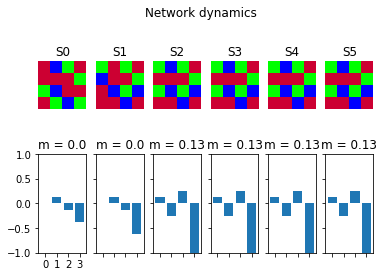

===== Iteration #28 =====


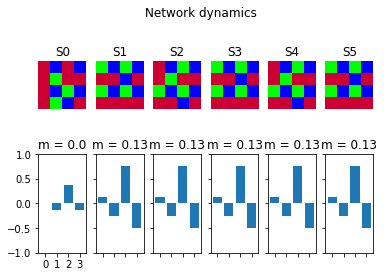

===== Iteration #29 =====


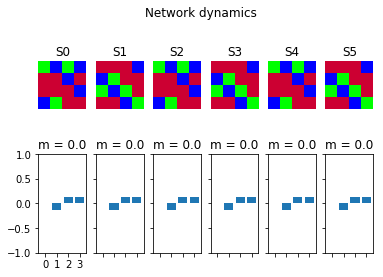

===== Iteration #30 =====


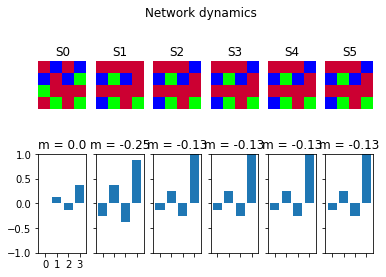

===== Iteration #31 =====


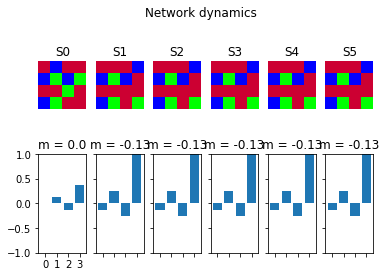

===== Iteration #32 =====


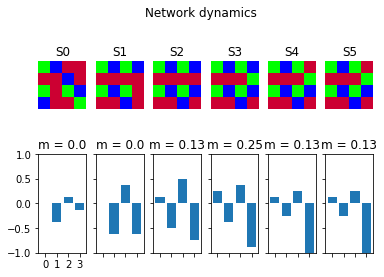

===== Iteration #33 =====


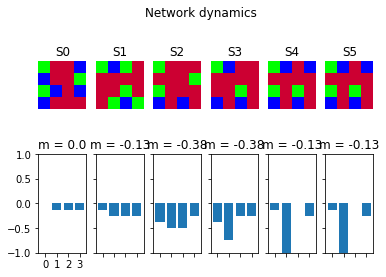

===== Iteration #34 =====


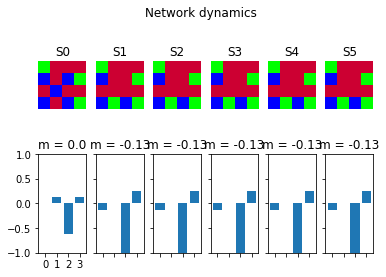

===== Iteration #35 =====


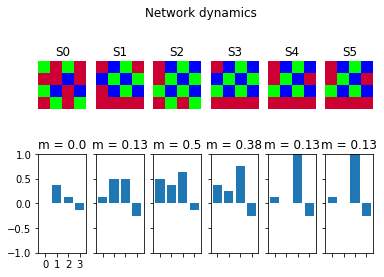

===== Iteration #36 =====


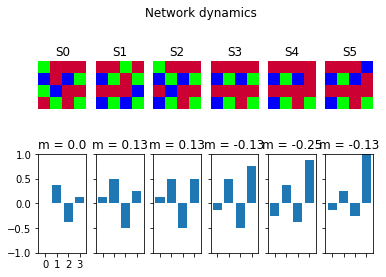

===== Iteration #37 =====


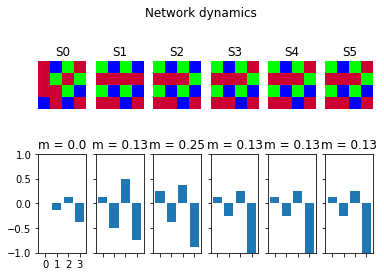

===== Iteration #38 =====


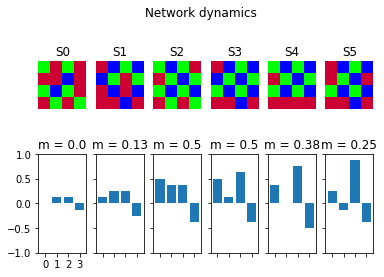

===== Iteration #39 =====


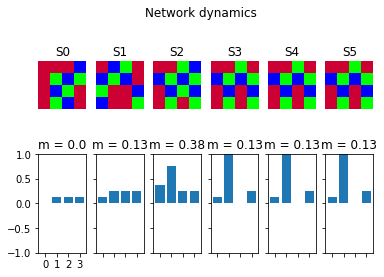

===== Iteration #40 =====


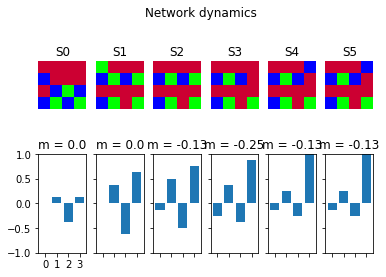

===== Iteration #41 =====


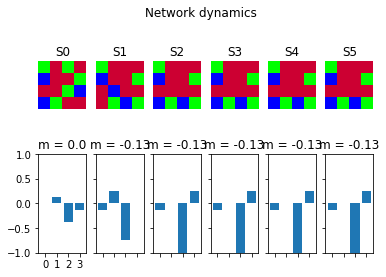

===== Iteration #42 =====


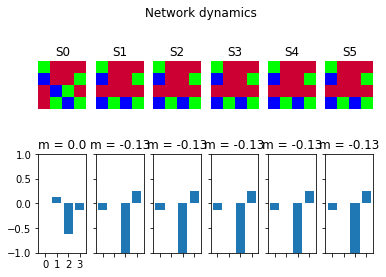

===== Iteration #43 =====


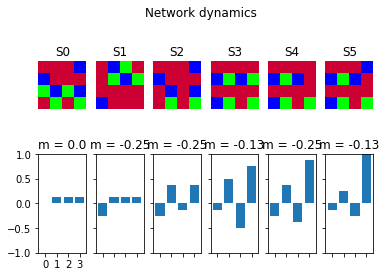

===== Iteration #44 =====


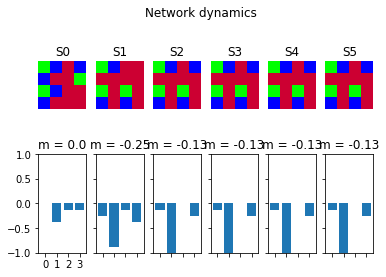

===== Iteration #45 =====


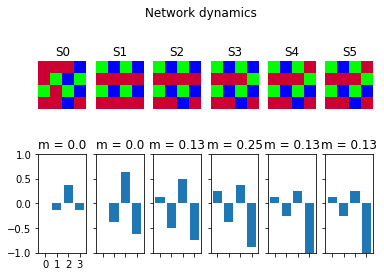

===== Iteration #46 =====


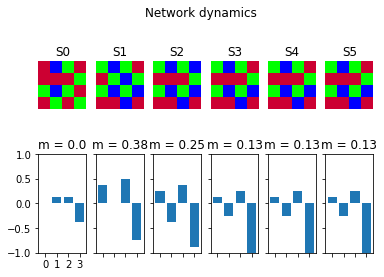

===== Iteration #47 =====


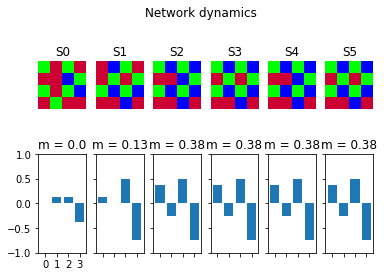

===== Iteration #48 =====


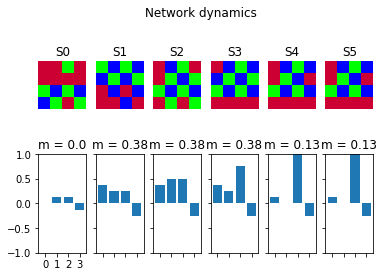

===== Iteration #49 =====


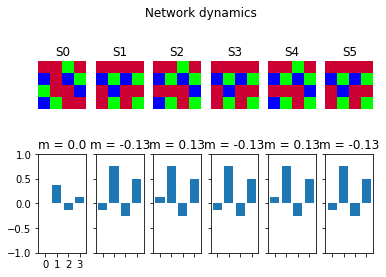

===== Iteration #50 =====


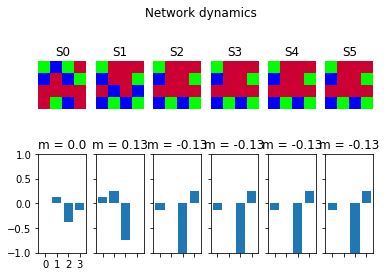

===== Iteration #51 =====


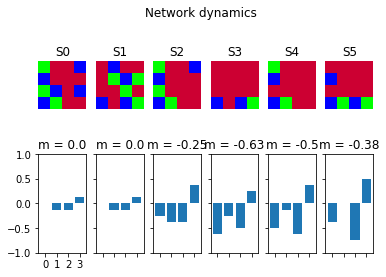

===== Iteration #52 =====


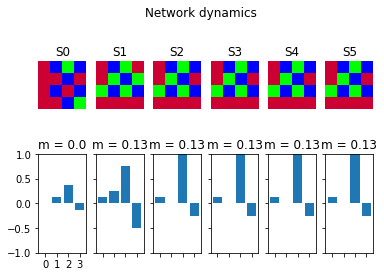

===== Iteration #53 =====


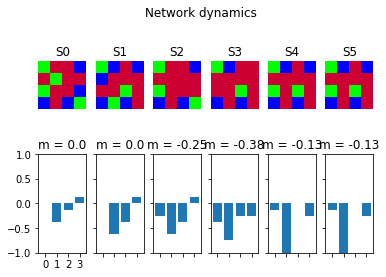

===== Iteration #54 =====


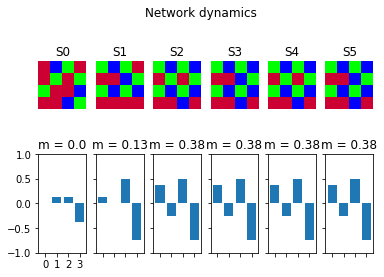

===== Iteration #55 =====


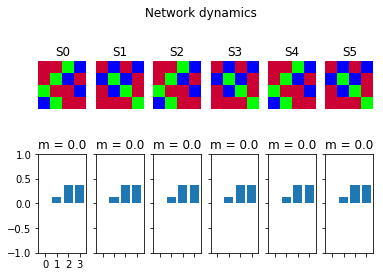

===== Iteration #56 =====


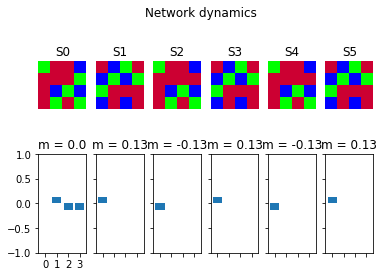

===== Iteration #57 =====


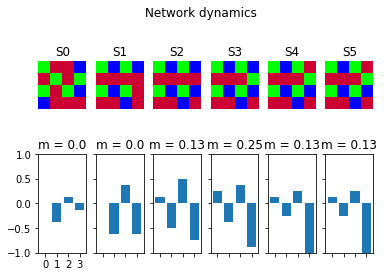

===== Iteration #58 =====


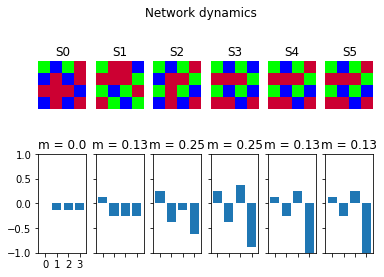

===== Iteration #59 =====


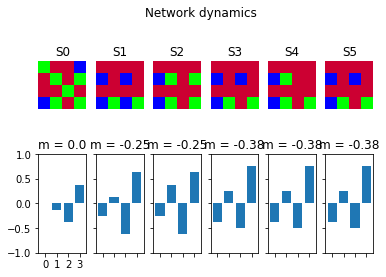

===== Iteration #60 =====


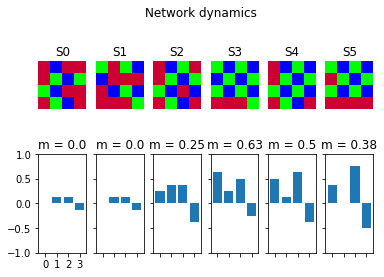

===== Iteration #61 =====


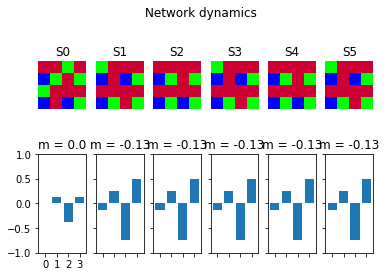

===== Iteration #62 =====


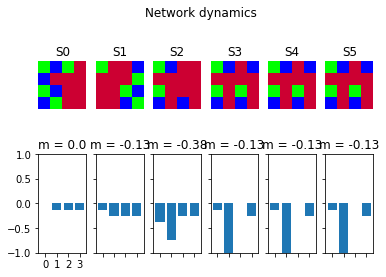

===== Iteration #63 =====


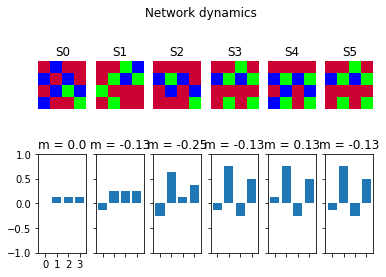

===== Iteration #64 =====


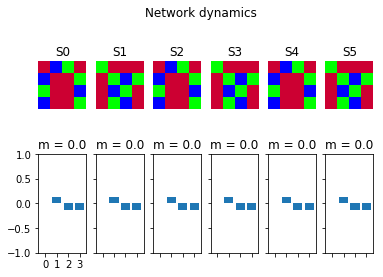

===== Iteration #65 =====


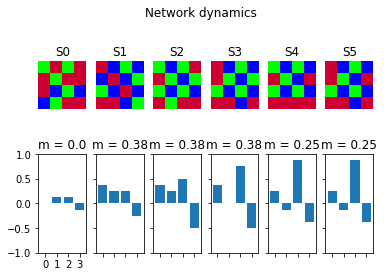

===== Iteration #66 =====


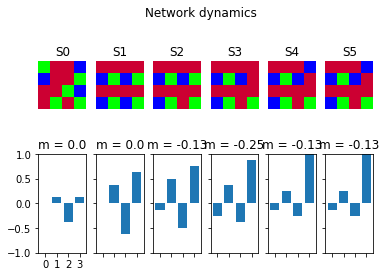

===== Iteration #67 =====


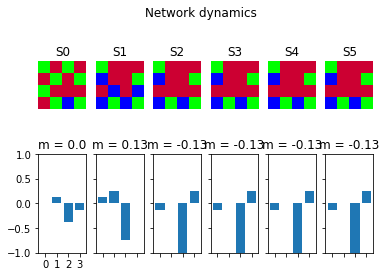

===== Iteration #68 =====


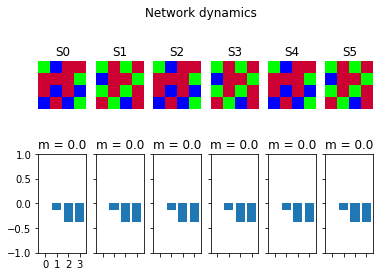

===== Iteration #69 =====


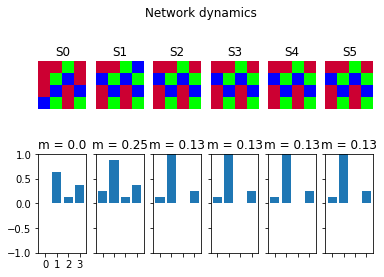

===== Iteration #70 =====


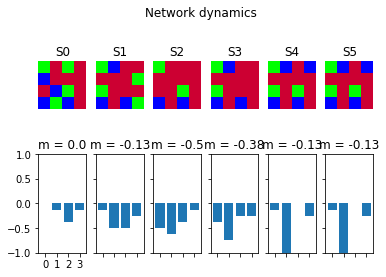

===== Iteration #71 =====


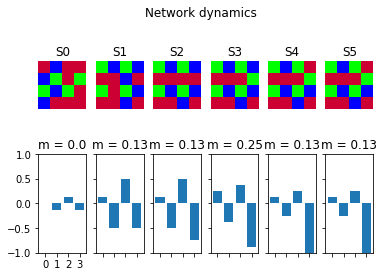

===== Iteration #72 =====


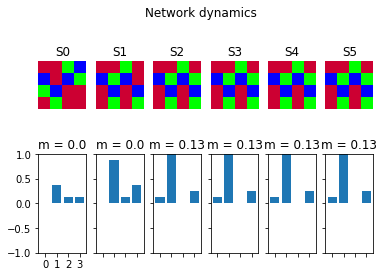

===== Iteration #73 =====


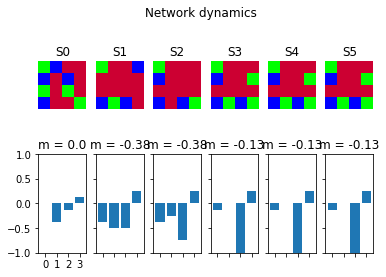

===== Iteration #74 =====


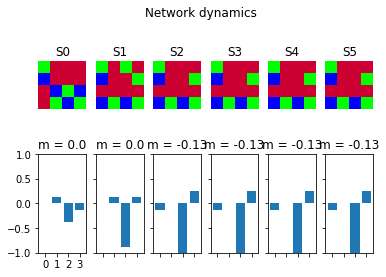

===== Iteration #75 =====


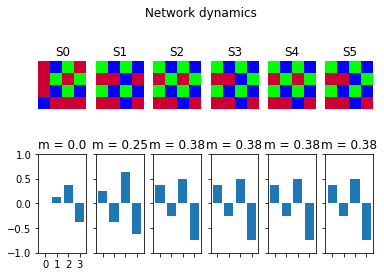

===== Iteration #76 =====


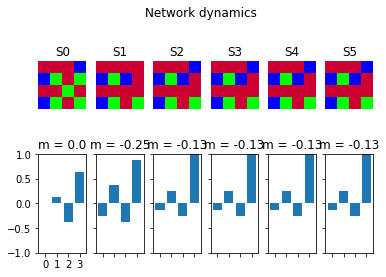

===== Iteration #77 =====


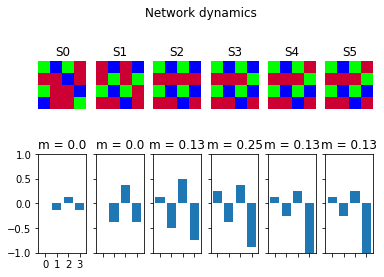

===== Iteration #78 =====


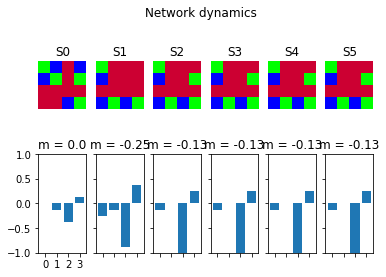

===== Iteration #79 =====


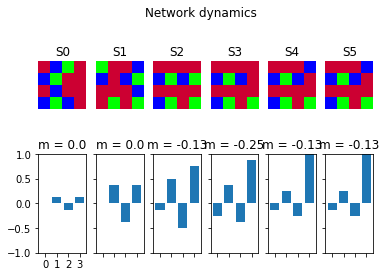

===== Iteration #80 =====


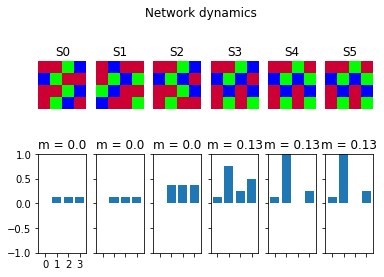

===== Iteration #81 =====


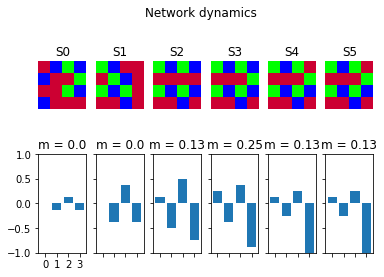

===== Iteration #82 =====


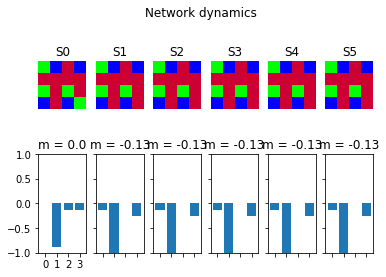

===== Iteration #83 =====


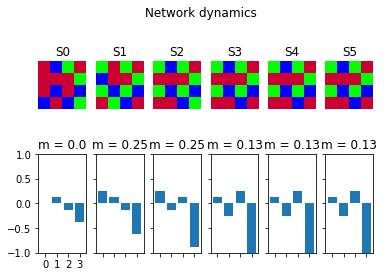

===== Iteration #84 =====


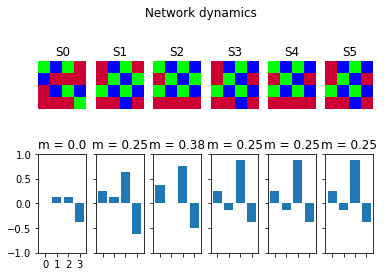

===== Iteration #85 =====


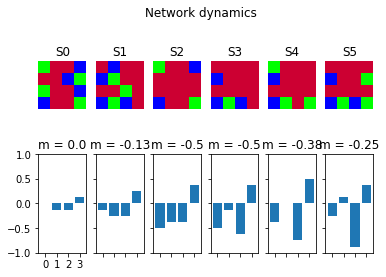

===== Iteration #86 =====


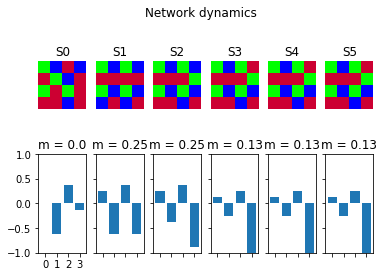

===== Iteration #87 =====


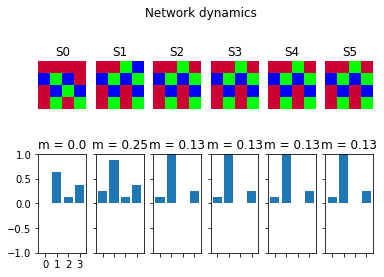

===== Iteration #88 =====


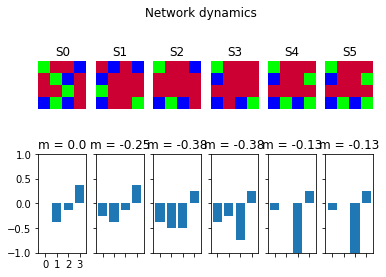

===== Iteration #89 =====


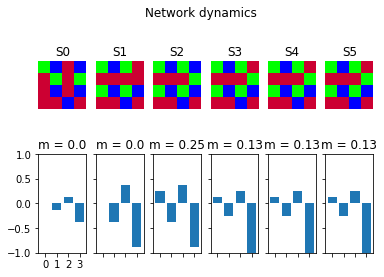

===== Iteration #90 =====


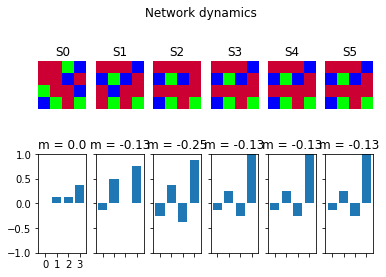

===== Iteration #91 =====


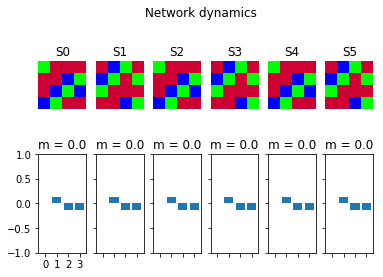

===== Iteration #92 =====


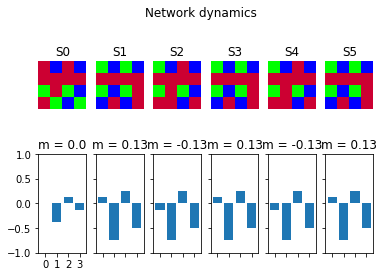

===== Iteration #93 =====


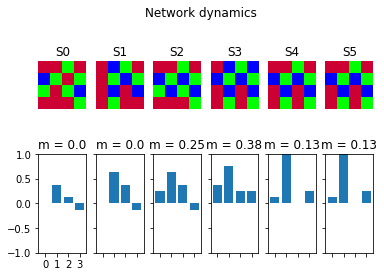

===== Iteration #94 =====


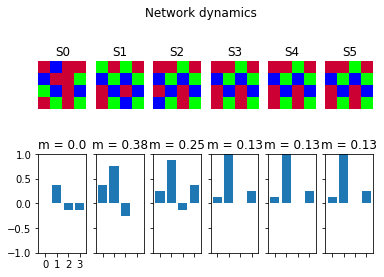

===== Iteration #95 =====


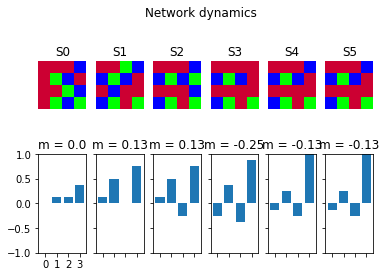

===== Iteration #96 =====


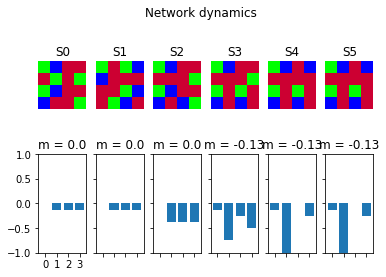

===== Iteration #97 =====


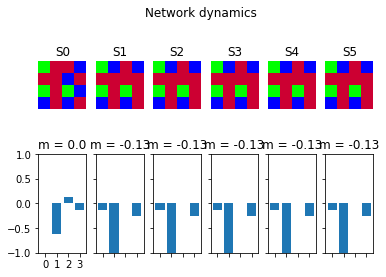

===== Iteration #98 =====


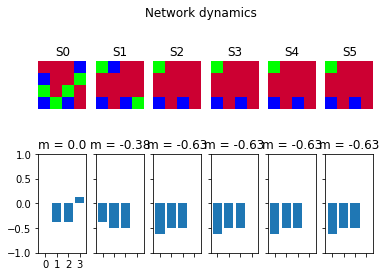

===== Iteration #99 =====


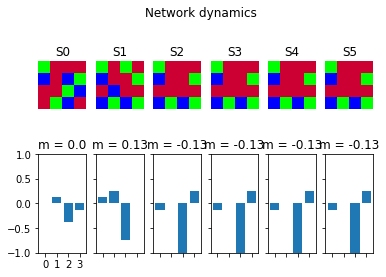

In [6]:
epochs= 100

for i in range(0,epochs):
    print("===== Iteration #{} =====".format(i))
    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=5)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    # Plot the sequence of network states along with the overlap of network state with the checkerboard
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
    print("======================")

It can still retrieve the pattern with 8 flipped bits. Let us look at 9 now:

===== Iteration #0 =====


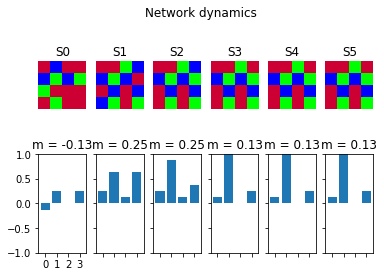

===== Iteration #1 =====


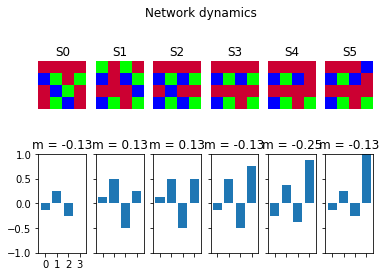

===== Iteration #2 =====


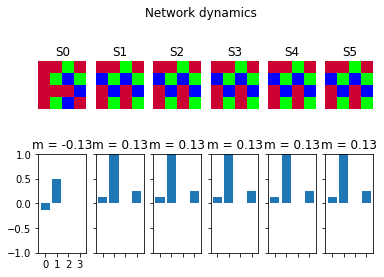

===== Iteration #3 =====


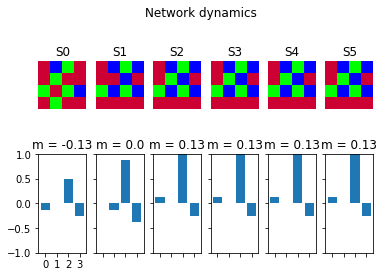

===== Iteration #4 =====


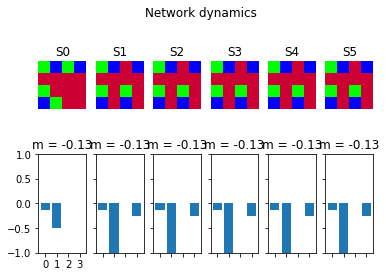

===== Iteration #5 =====


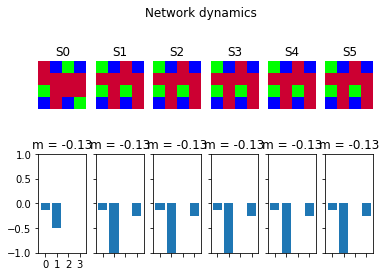

===== Iteration #6 =====


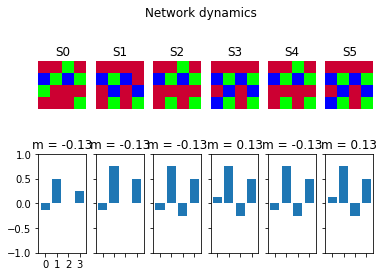

===== Iteration #7 =====


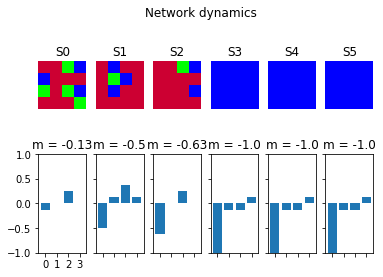

===== Iteration #8 =====


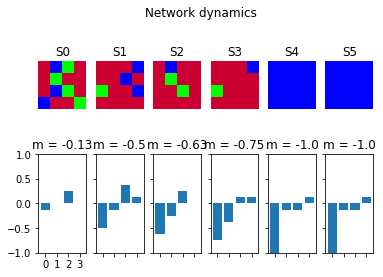

===== Iteration #9 =====


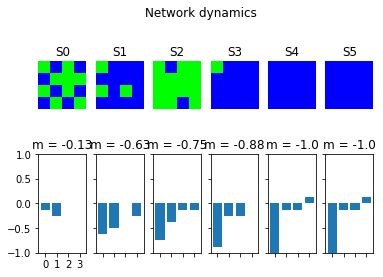

===== Iteration #10 =====


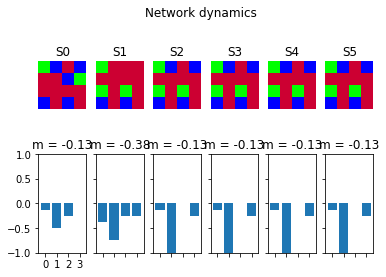

===== Iteration #11 =====


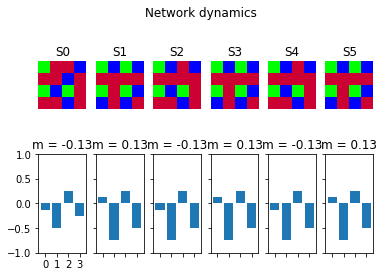

===== Iteration #12 =====


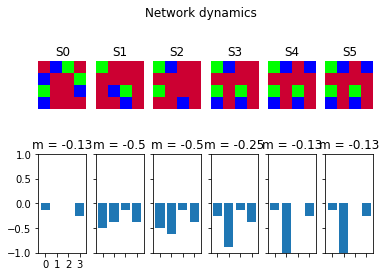

===== Iteration #13 =====


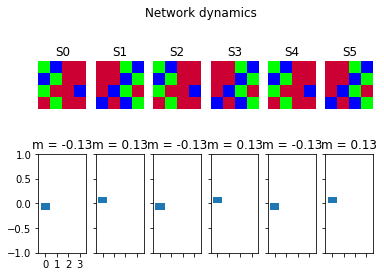

===== Iteration #14 =====


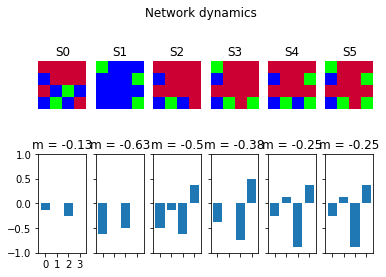

===== Iteration #15 =====


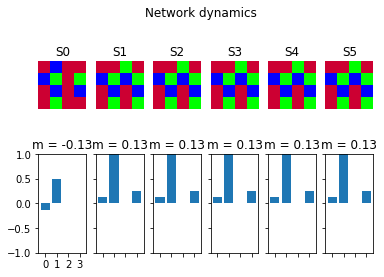

===== Iteration #16 =====


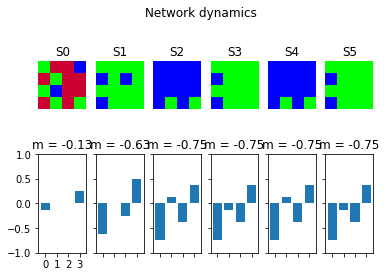

===== Iteration #17 =====


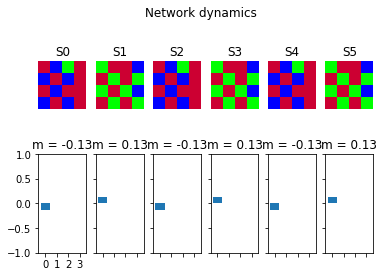

===== Iteration #18 =====


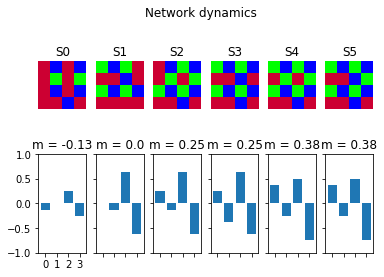

===== Iteration #19 =====


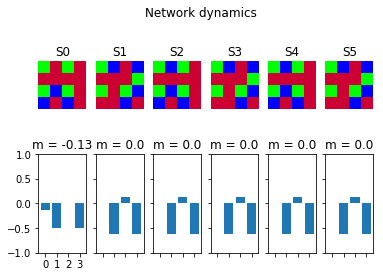

===== Iteration #20 =====


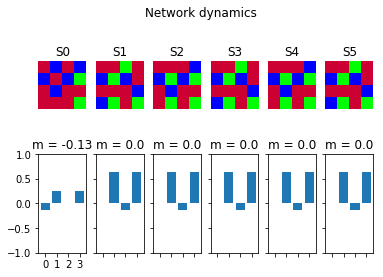

===== Iteration #21 =====


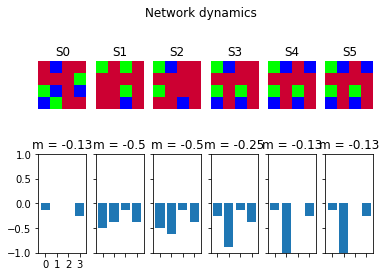

===== Iteration #22 =====


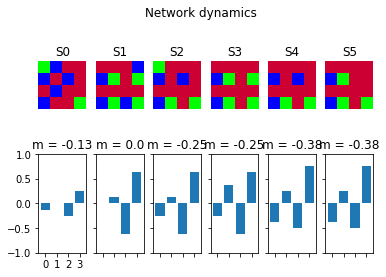

===== Iteration #23 =====


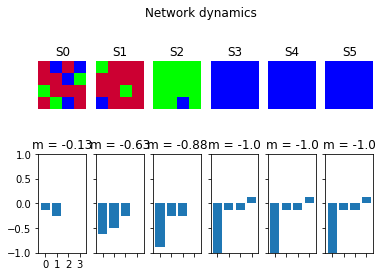

===== Iteration #24 =====


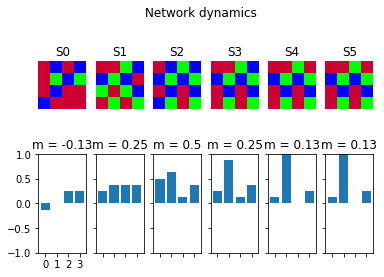

===== Iteration #25 =====


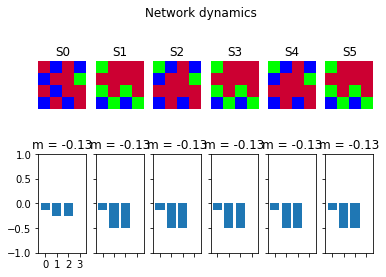

===== Iteration #26 =====


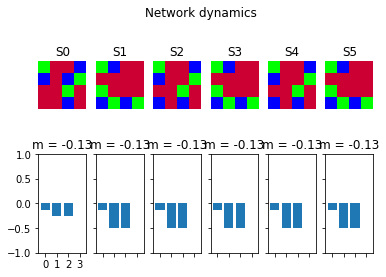

===== Iteration #27 =====


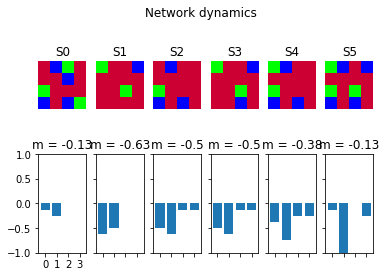

===== Iteration #28 =====


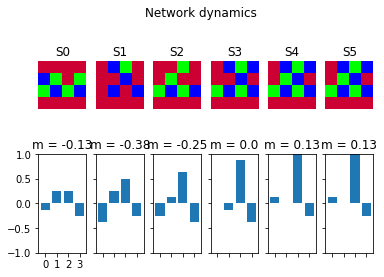

===== Iteration #29 =====


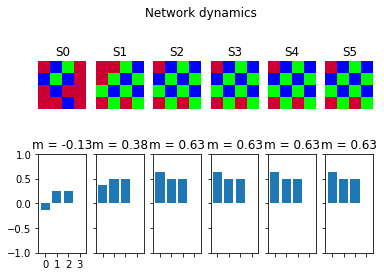

===== Iteration #30 =====


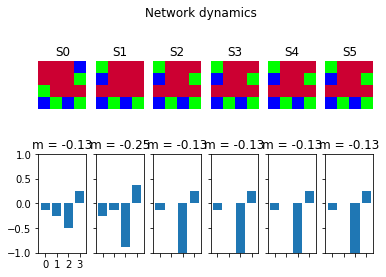

===== Iteration #31 =====


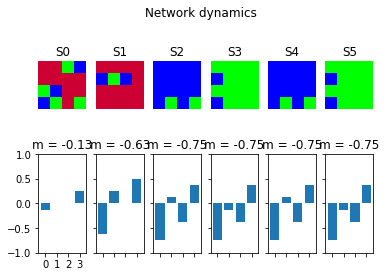

===== Iteration #32 =====


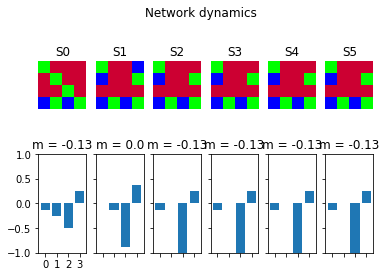

===== Iteration #33 =====


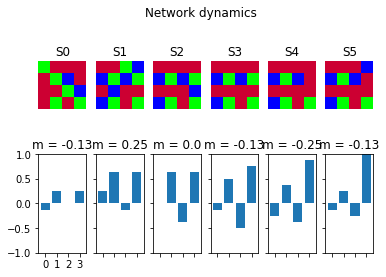

===== Iteration #34 =====


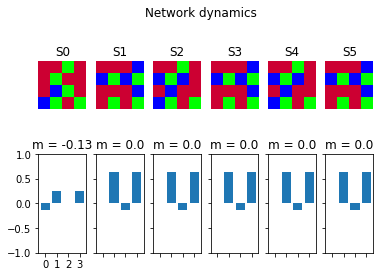

===== Iteration #35 =====


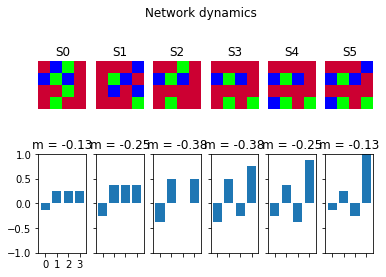

===== Iteration #36 =====


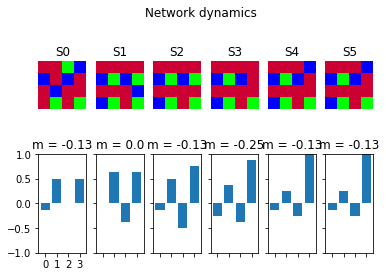

===== Iteration #37 =====


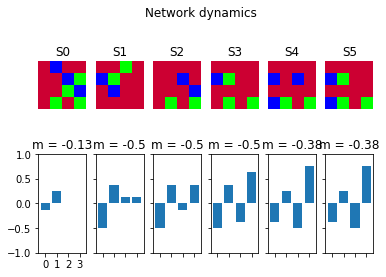

===== Iteration #38 =====


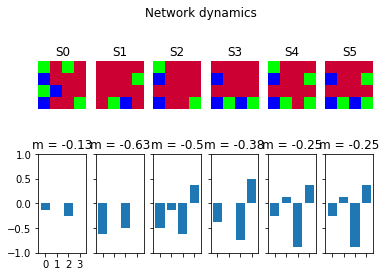

===== Iteration #39 =====


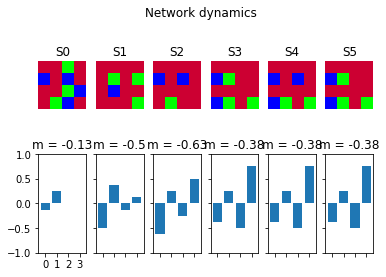

===== Iteration #40 =====


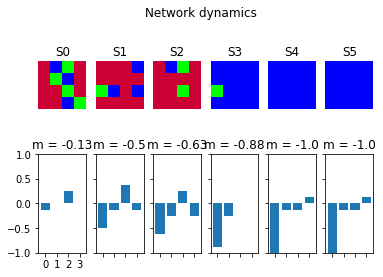

===== Iteration #41 =====


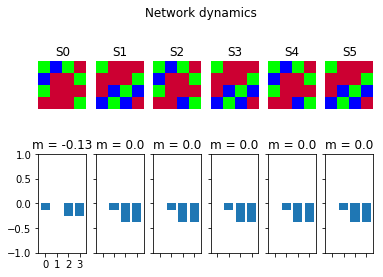

===== Iteration #42 =====


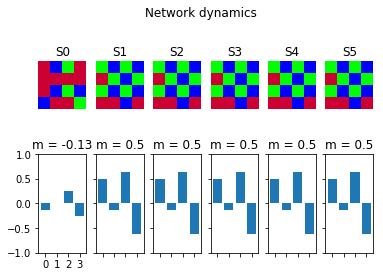

===== Iteration #43 =====


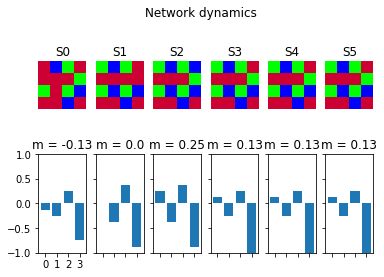

===== Iteration #44 =====


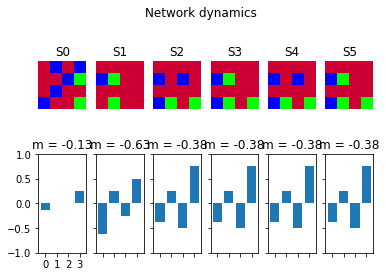

===== Iteration #45 =====


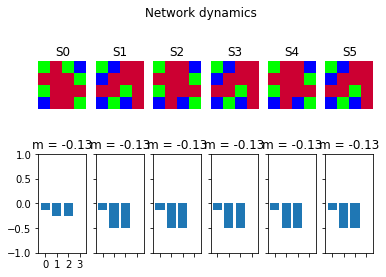

===== Iteration #46 =====


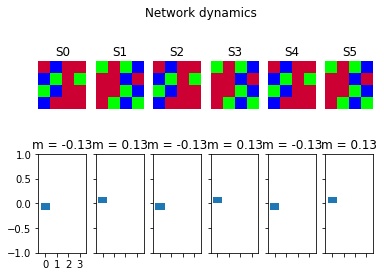

===== Iteration #47 =====


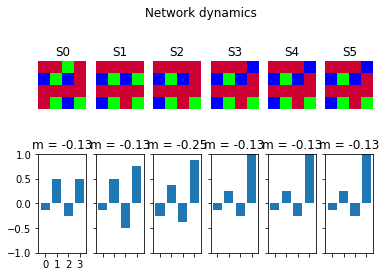

===== Iteration #48 =====


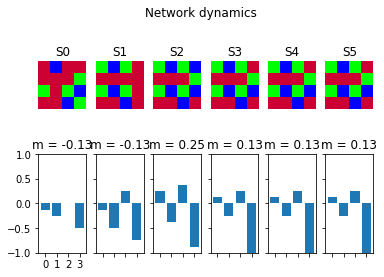

===== Iteration #49 =====


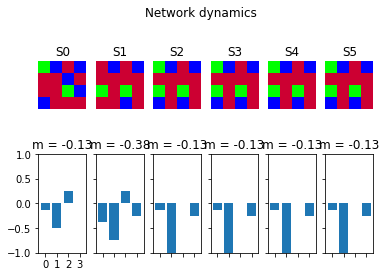

===== Iteration #50 =====


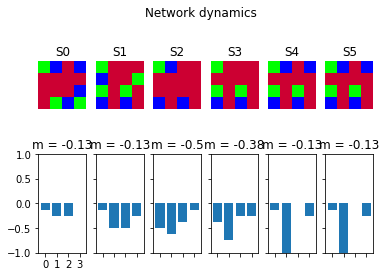

===== Iteration #51 =====


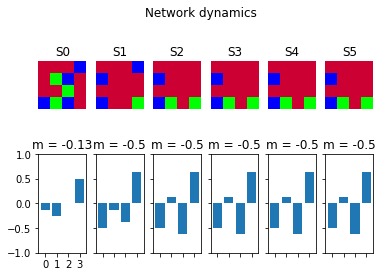

===== Iteration #52 =====


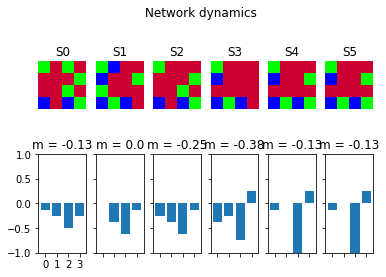

===== Iteration #53 =====


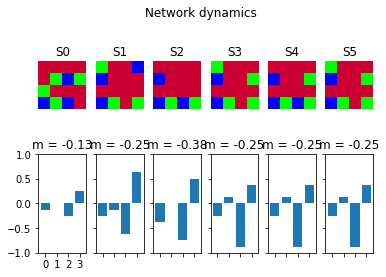

===== Iteration #54 =====


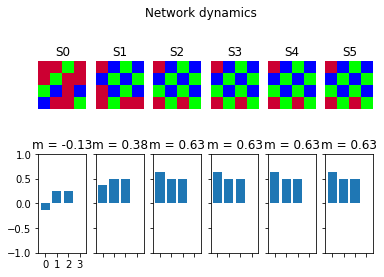

===== Iteration #55 =====


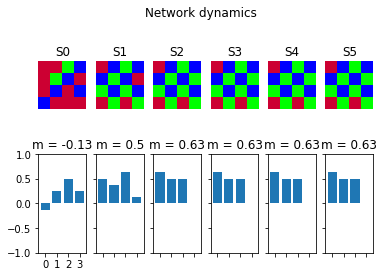

===== Iteration #56 =====


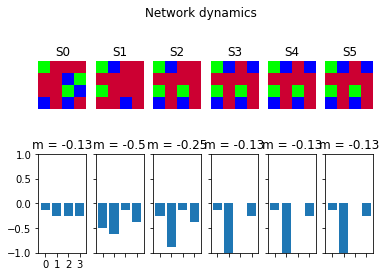

===== Iteration #57 =====


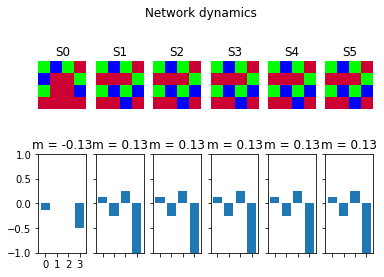

===== Iteration #58 =====


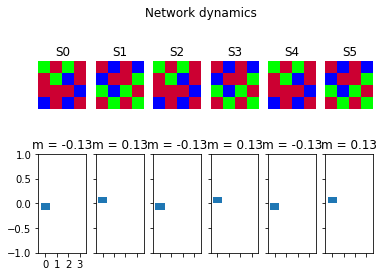

===== Iteration #59 =====


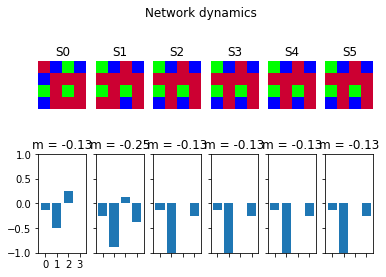

===== Iteration #60 =====


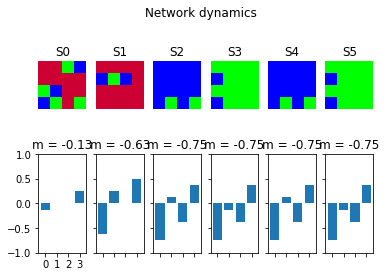

===== Iteration #61 =====


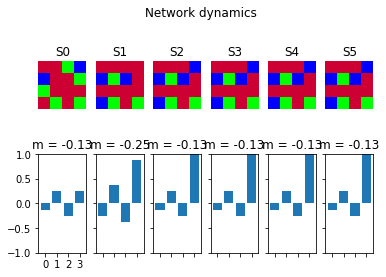

===== Iteration #62 =====


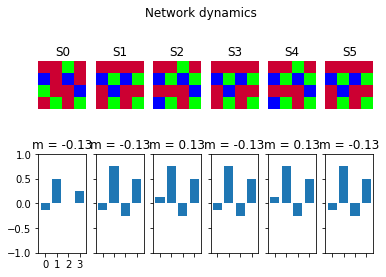

===== Iteration #63 =====


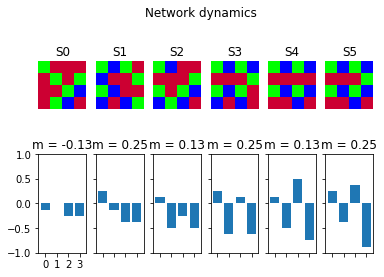

===== Iteration #64 =====


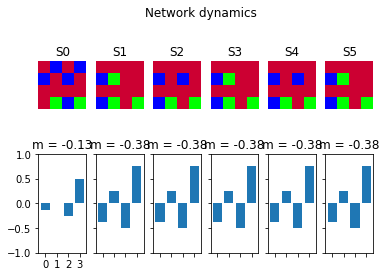

===== Iteration #65 =====


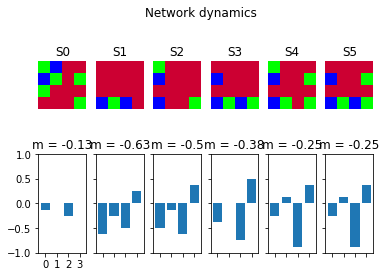

===== Iteration #66 =====


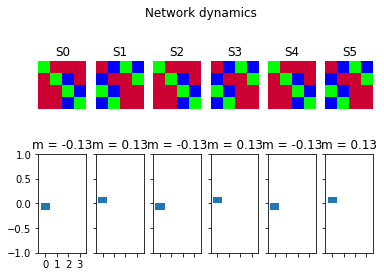

===== Iteration #67 =====


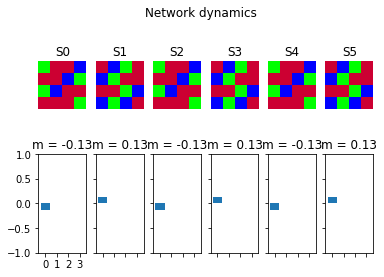

===== Iteration #68 =====


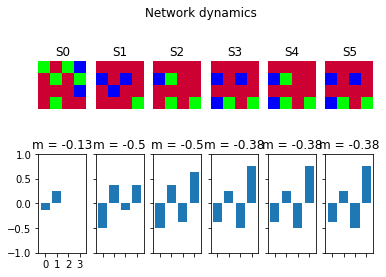

===== Iteration #69 =====


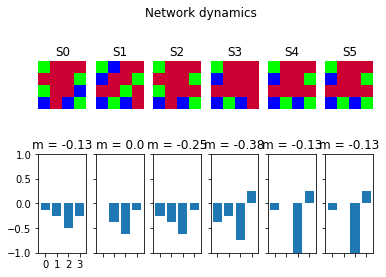

===== Iteration #70 =====


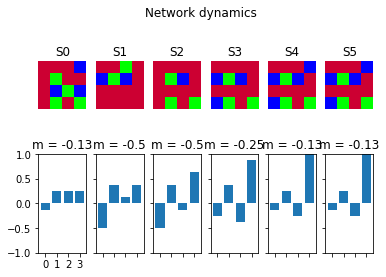

===== Iteration #71 =====


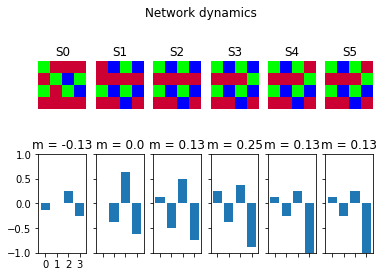

===== Iteration #72 =====


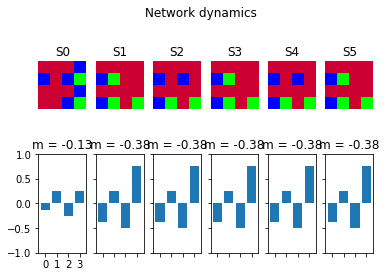

===== Iteration #73 =====


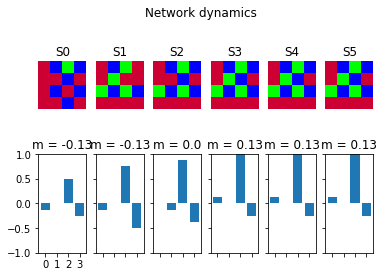

===== Iteration #74 =====


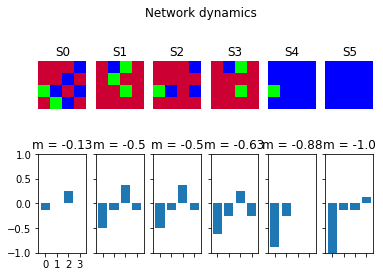

===== Iteration #75 =====


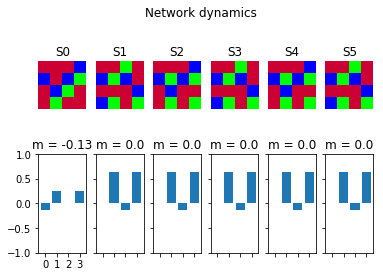

===== Iteration #76 =====


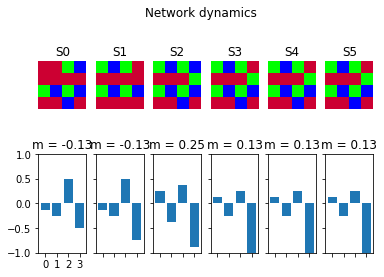

===== Iteration #77 =====


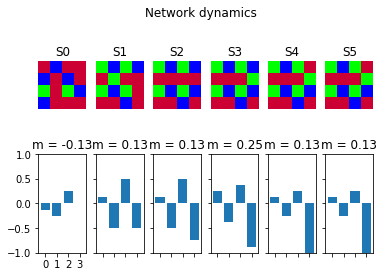

===== Iteration #78 =====


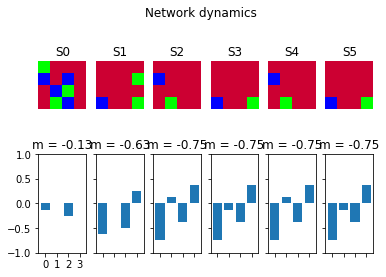

===== Iteration #79 =====


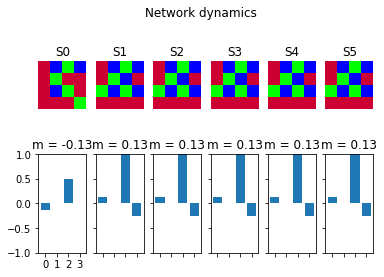

===== Iteration #80 =====


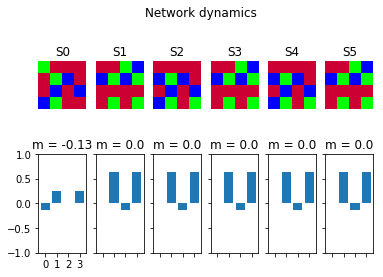

===== Iteration #81 =====


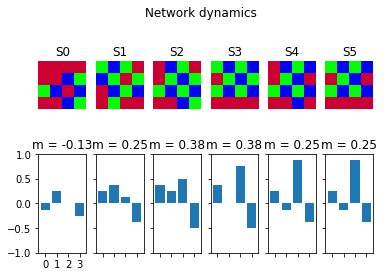

===== Iteration #82 =====


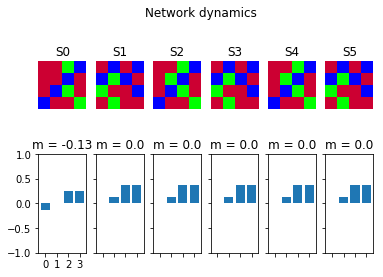

===== Iteration #83 =====


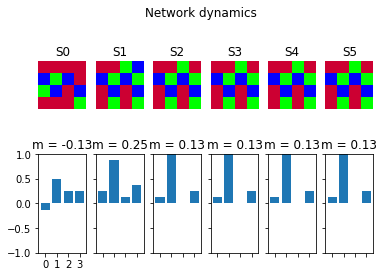

===== Iteration #84 =====


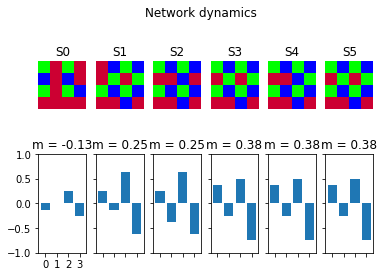

===== Iteration #85 =====


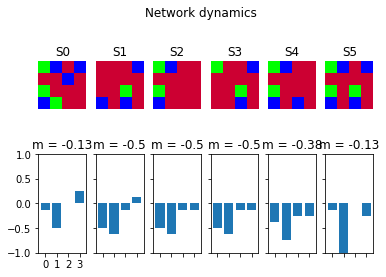

===== Iteration #86 =====


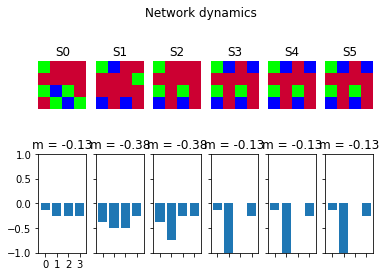

===== Iteration #87 =====


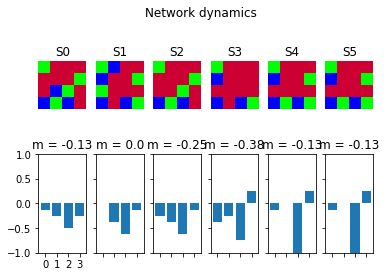

===== Iteration #88 =====


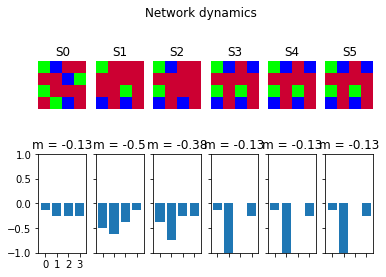

===== Iteration #89 =====


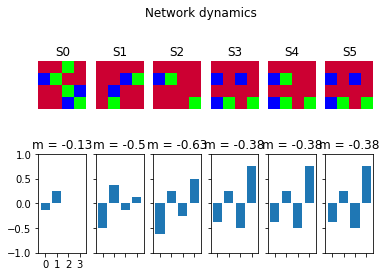

===== Iteration #90 =====


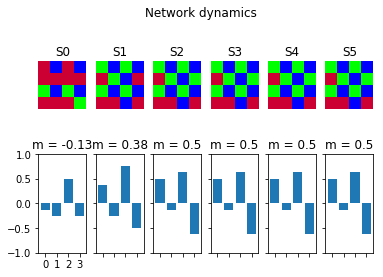

===== Iteration #91 =====


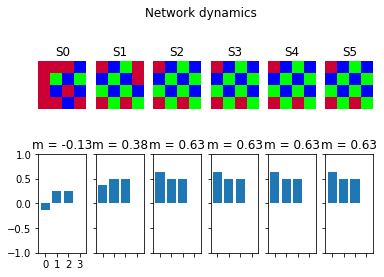

===== Iteration #92 =====


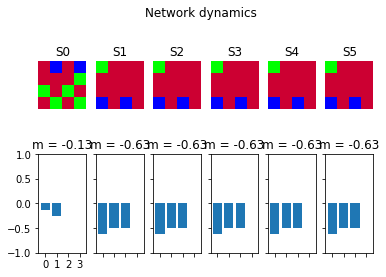

===== Iteration #93 =====


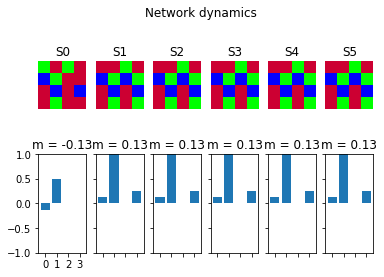

===== Iteration #94 =====


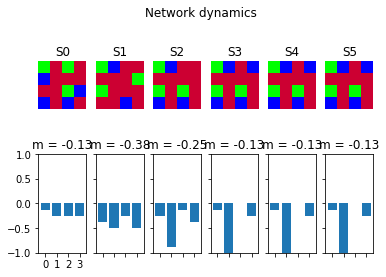

===== Iteration #95 =====


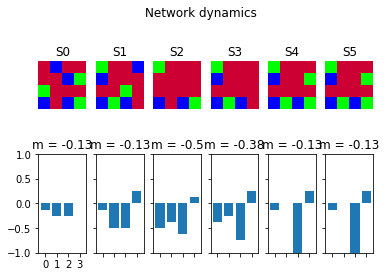

===== Iteration #96 =====


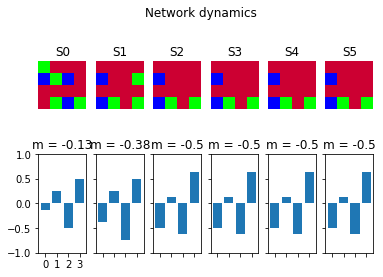

===== Iteration #97 =====


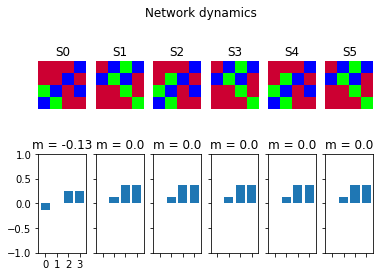

===== Iteration #98 =====


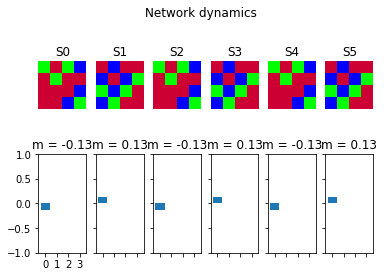

===== Iteration #99 =====


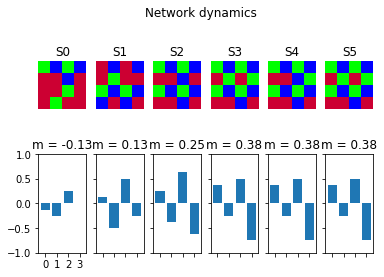

In [7]:
epochs= 100

for i in range(0,epochs):
    print("===== Iteration #{} =====".format(i))
    noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=9)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=5)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    # Plot the sequence of network states along with the overlap of network state with the checkerboard
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
    print("======================")

One can see that retrieving the original pattern becomes impossible when we flip more than 8 bits

## 8.3.2. Question: the weights matrix
#### [1 + 3 + 2 points]

8.3.2.2 The size of the weight matrix is 16x16

In [20]:
def createHopfieldNet(pattern, pattern_size=4,  plot_matrix=False):
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    if(plot_matrix):
        plot_tools.plot_nework_weights(hopfield_net)
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
    pattern_list = [pattern]
    hopfield_net.store_patterns(pattern_list)
    return hopfield_net


In [22]:
def createHopfieldNetWithList(pattern_list, pattern_size=4,  plot_matrix=False):
    hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
    if(plot_matrix):
        plot_tools.plot_nework_weights(hopfield_net)
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
    hopfield_net.store_patterns(pattern_list)
    return hopfield_net


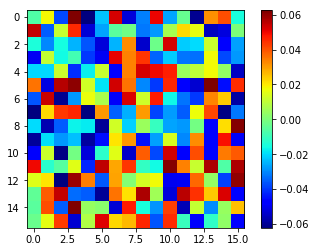

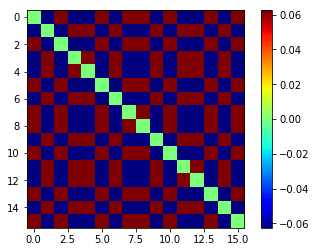

In [21]:
# write your code here: Bullet points 1-5 
pattern_size = 4
hopfield_net = createHopfieldNet(factory.create_checkerboard(), pattern_size, True)
plot_tools.plot_nework_weights(hopfield_net)

Plot the weights matrix. What weight values do occur?

The first matrix is purely random. As such, weights between -0.06 and 0.06 occur. The second matrix is initialized around a pattern, so there are only three values; 0.06, -0.06 and 0 (on the diagonal). The second matrix is symmetric, but the diagonal is also equal to 0 because we define it this way (no self connection).

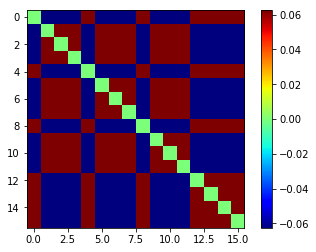

In [10]:
# write your code here: Bullet points 6-11
hopfield_net = createHopfieldNet(factory.create_L_pattern(), pattern_size)
plot_tools.plot_nework_weights(hopfield_net)

The weight values are the same as those of the checkerboard weight matrix, ie only 0.06, -0.06 and 0 for the same reasons. The matrix is also symmetric and its diagonal is still zero, again by our definition.

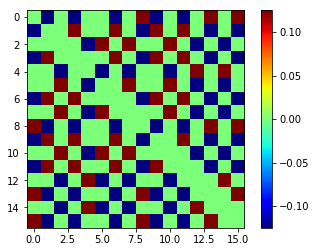

In [25]:
hopfield_net = createHopfieldNetWithList([factory.create_checkerboard(), factory.create_L_pattern()], pattern_size)
plot_tools.plot_nework_weights(hopfield_net)

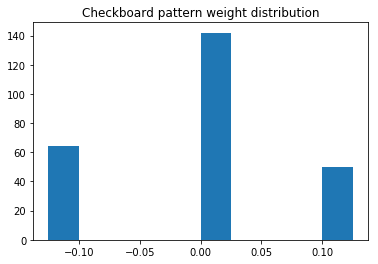

In [26]:
plt.figure()
plt.title('Checkboard pattern weight distribution')
plt.hist(hopfield_net.weights.flatten())
plt.show()

How does this matrix compare to the two previous matrices?

Interestingly, it still spans only three values, but the zero values now spread beyond the diagonal; the matrix is still symmetric.

## 8.3.3. Question (optional): Weights Distribution

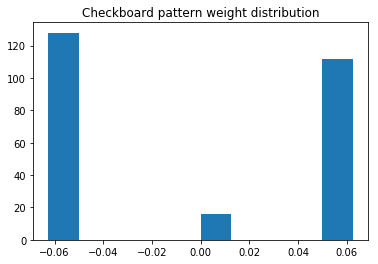

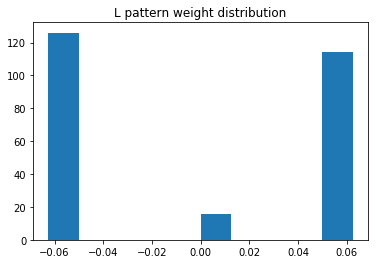

In [11]:
# You can easily plot a histogram by adding the following two lines to your script. 
#It assumes you have stored your network in the variable ‘hopfield_net’.
import matplotlib.pyplot as plt

hopfield_net = createHopfieldNet(factory.create_checkerboard(), pattern_size)
plt.figure()
plt.title('Checkboard pattern weight distribution')
plt.hist(hopfield_net.weights.flatten())
plt.show()


hopfield_net_L = createHopfieldNet(factory.create_L_pattern(), pattern_size)
plt.figure()
plt.title('L pattern weight distribution')
plt.hist(hopfield_net_L.weights.flatten())
plt.show()

# 8.4. Exercise: Capacity of an N=100 Hopfield-network
## 8.4.1. Associative memory.
#### [2 points]

A Hopfield network implements so called associative or content-adressable memory. Explain what this means. (max 4 lines)


It stores a table of patterns (each pattern being a string); upon getting an input pattern to recognize, the Hopfield model basically tries to lookup its table of patterns and match the corresponding pattern.
Its content is adressed by the µ index of a pattern, thus by content, hence the name.

## 8.4.2. Capacity of the network.
#### [1 points]

Using the value $C_{store}$
 given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:


Assuming $C_{store} = 0.138$, we know that $ M_{max} = C_{store} * N  = 0.138 * 100 = 13.8 = 13$ patterns 

## 8.4.3. Checkerboard and random patterns.
#### [3 points]

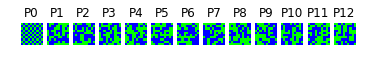

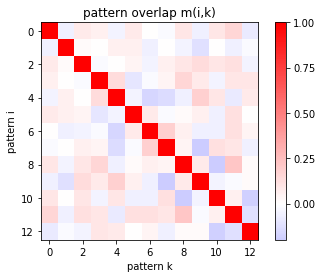

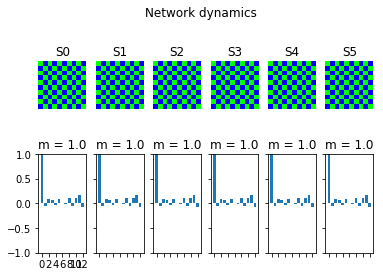

In [54]:
# write your code here

pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=12, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

hopfield_net.set_state_from_pattern(checkerboard)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

===== Iteration #0 =====


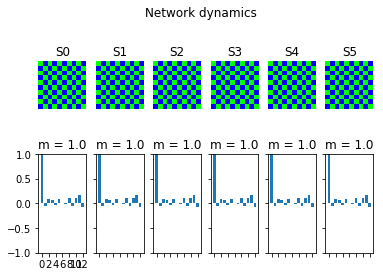

===== Iteration #1 =====


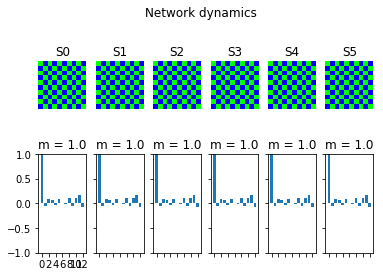

===== Iteration #2 =====


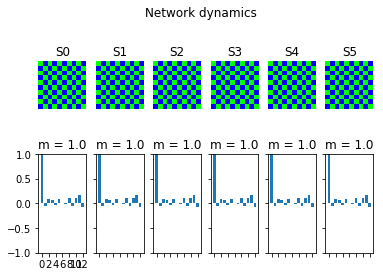

===== Iteration #3 =====


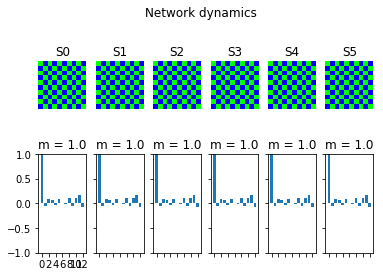

===== Iteration #4 =====


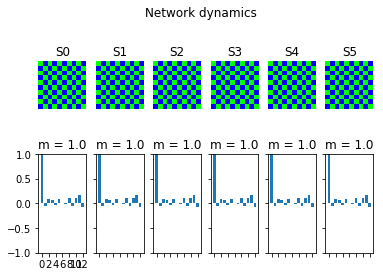

===== Iteration #5 =====


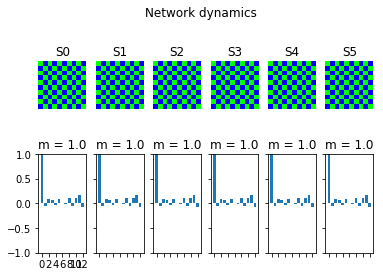

===== Iteration #6 =====


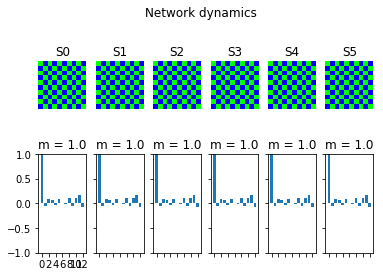

===== Iteration #7 =====


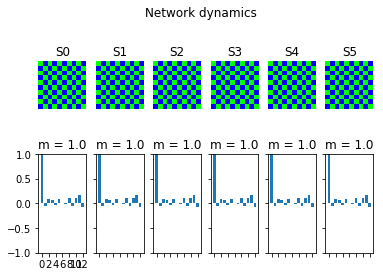

===== Iteration #8 =====


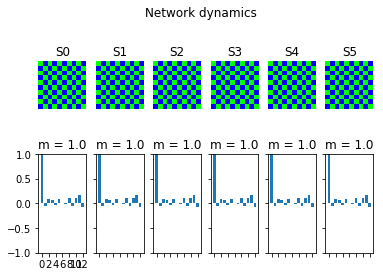

===== Iteration #9 =====


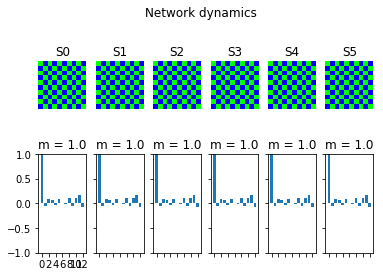

===== Iteration #10 =====


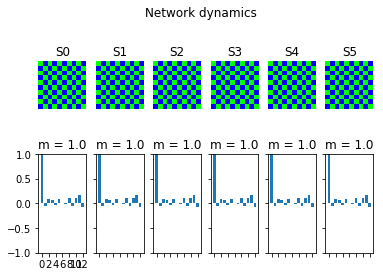

===== Iteration #11 =====


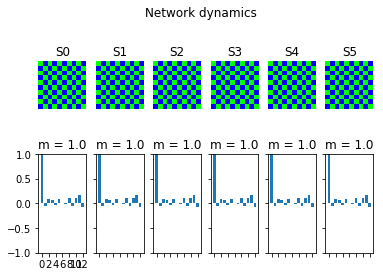

===== Iteration #12 =====


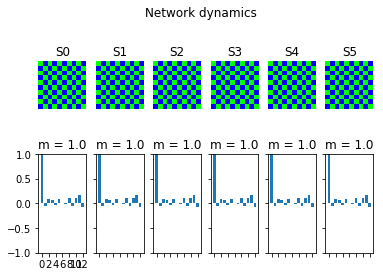

===== Iteration #13 =====


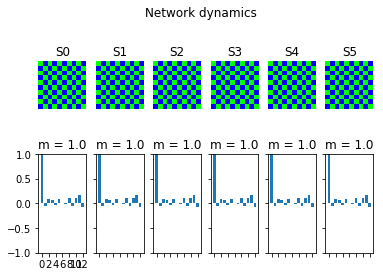

===== Iteration #14 =====


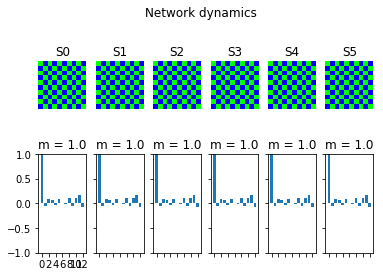

===== Iteration #15 =====


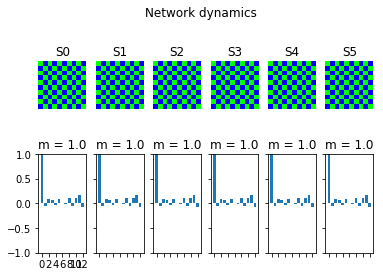

===== Iteration #16 =====


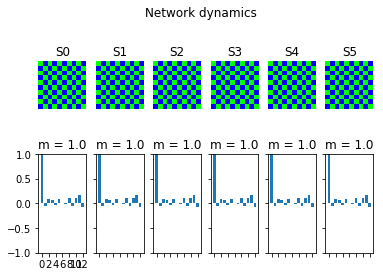

===== Iteration #17 =====


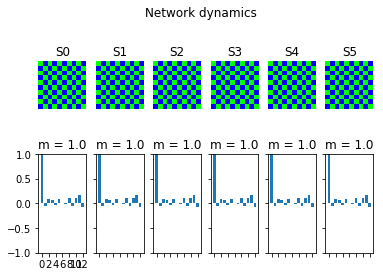

===== Iteration #18 =====


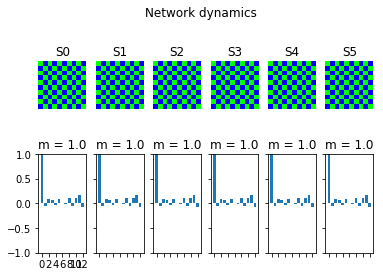

===== Iteration #19 =====


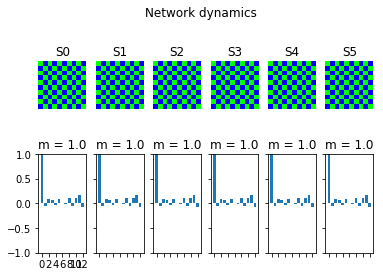

===== Iteration #20 =====


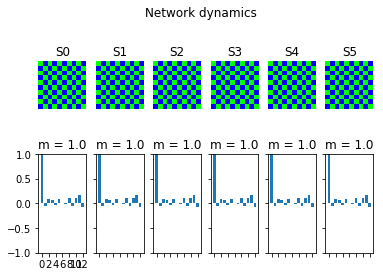

===== Iteration #21 =====


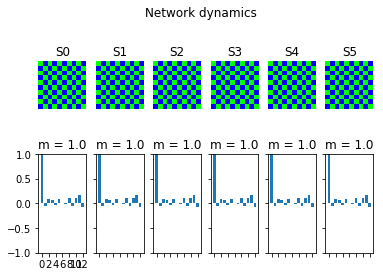

===== Iteration #22 =====


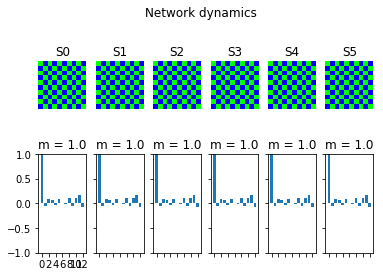

===== Iteration #23 =====


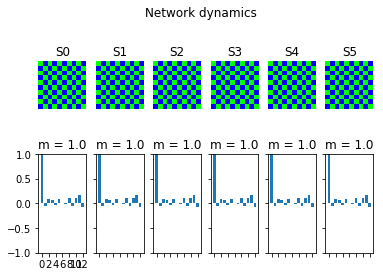

===== Iteration #24 =====


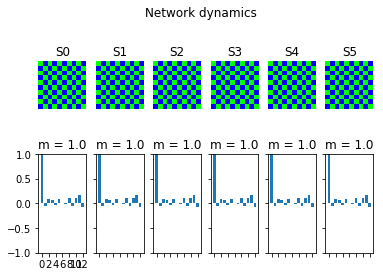

===== Iteration #25 =====


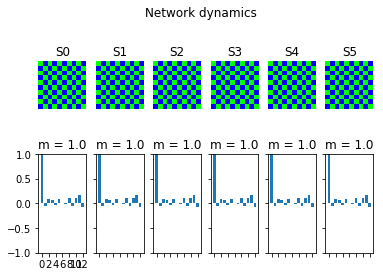

===== Iteration #26 =====


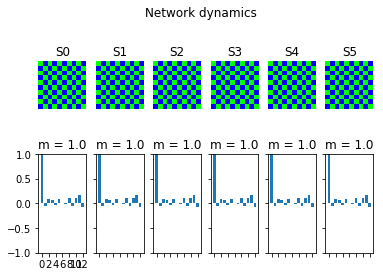

===== Iteration #27 =====


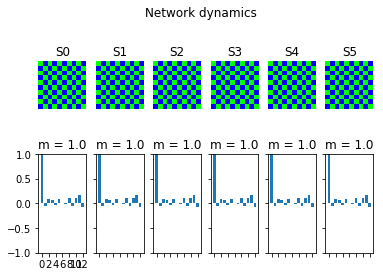

===== Iteration #28 =====


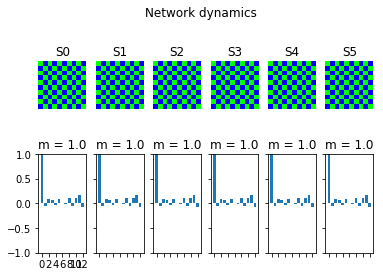

===== Iteration #29 =====


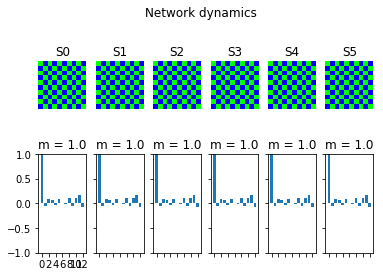

===== Iteration #30 =====


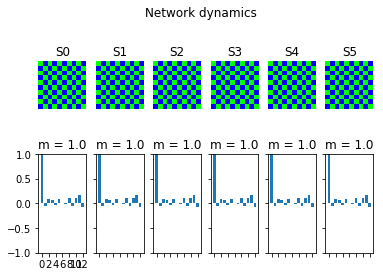

===== Iteration #31 =====


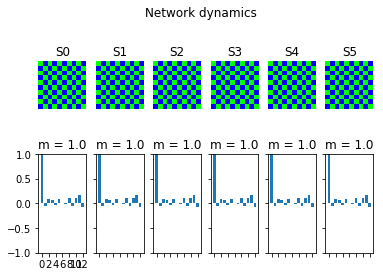

===== Iteration #32 =====


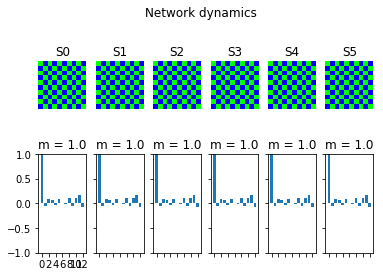

===== Iteration #33 =====


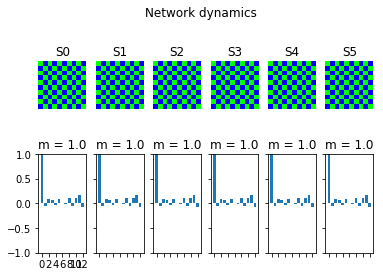

===== Iteration #34 =====


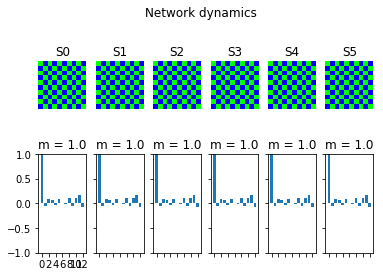

===== Iteration #35 =====


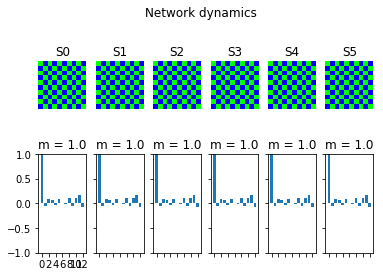

===== Iteration #36 =====


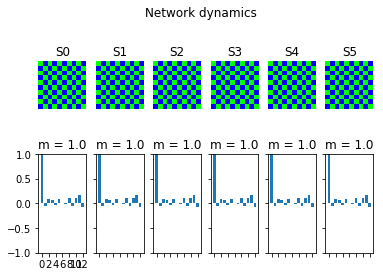

===== Iteration #37 =====


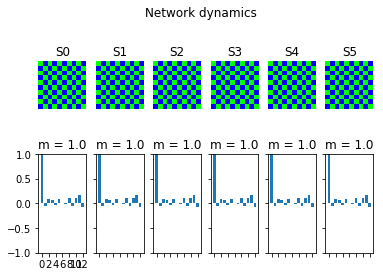

===== Iteration #38 =====


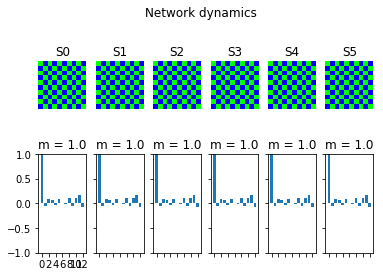

===== Iteration #39 =====


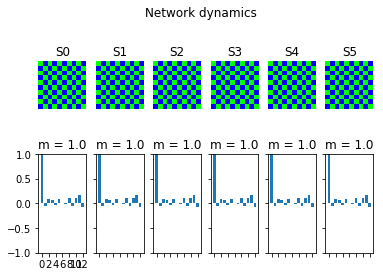

===== Iteration #40 =====


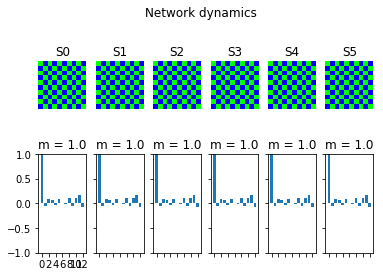

===== Iteration #41 =====


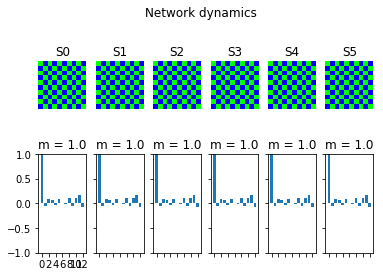

===== Iteration #42 =====


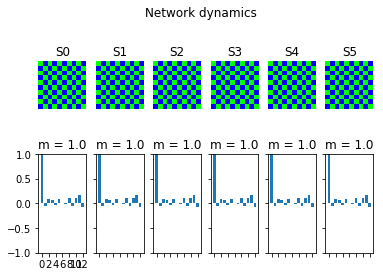

===== Iteration #43 =====


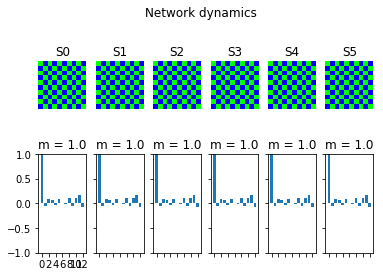

===== Iteration #44 =====


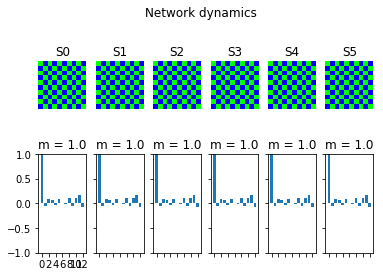

===== Iteration #45 =====


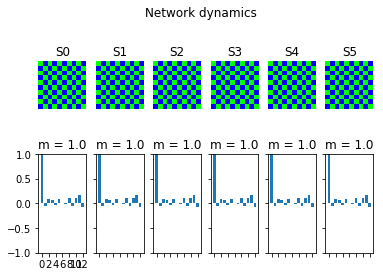

===== Iteration #46 =====


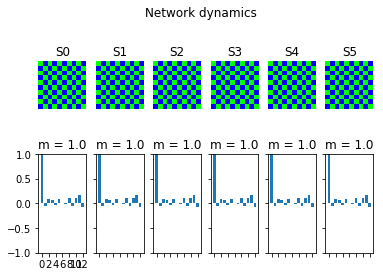

===== Iteration #47 =====


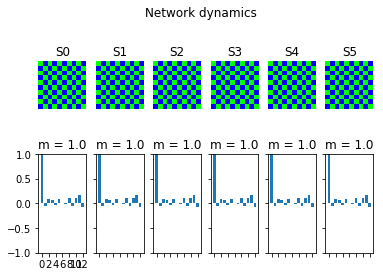

===== Iteration #48 =====


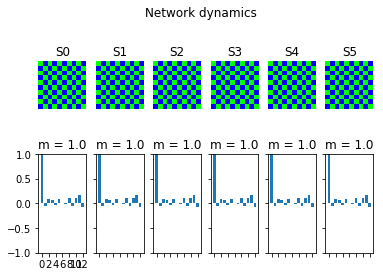

===== Iteration #49 =====


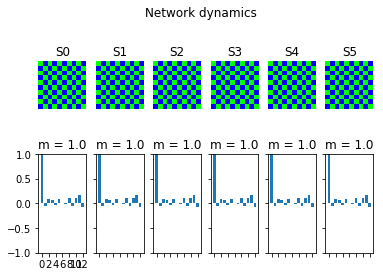

===== Iteration #50 =====


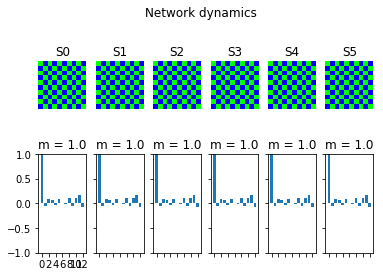

===== Iteration #51 =====


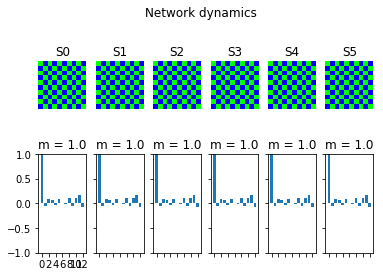

===== Iteration #52 =====


In [ ]:
epochs= 100

for i in range(0,epochs):
    print("===== Iteration #{} =====".format(i))
    hopfield_net = createHopfieldNetWithList(pattern_list, pattern_size)
    hopfield_net.set_state_from_pattern(checkerboard)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=5)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states)
    # plot the states of the network
    # Plot the sequence of network states along with the overlap of network state with the checkerboard
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")
    print("======================")

Rerun your script a few times. What do you observe? 
#### [2 points]

The network doesn't always retrieve the correct pattern! It is an associative memory with noise!

# 8.5. Exercise: Non-random patterns
## 8.5.1. Alphabet.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


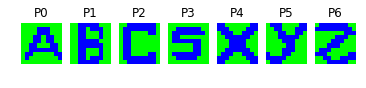

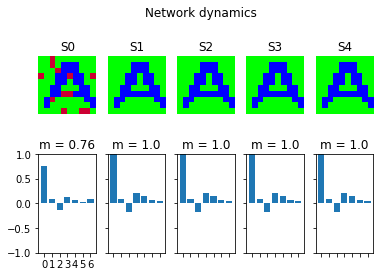

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.5.2. Add a letter.
#### [2 points]

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


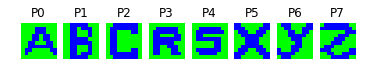

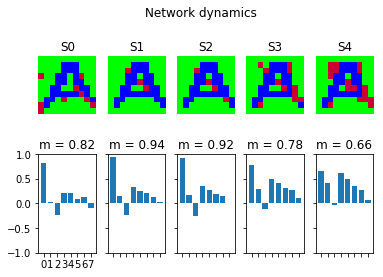

In [30]:
# write your code here
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'R','S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Is the pattern ‘A’ still a fixed point? 
Does the overlap between the network state and the reference pattern ‘A’ always decrease? (max 3 lines)
#### [3 points]

A is not a fixed point anymore; the network may actually diverge, as we see above, from A, and flip MORE bits, trying to reach R (the overlap therefore can increase).

## 8.5.3. Capacity.
#### [3 points]

We would guess 13 patterns, since the network contains 10x10 neurons.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


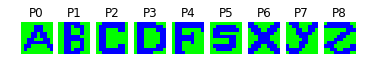

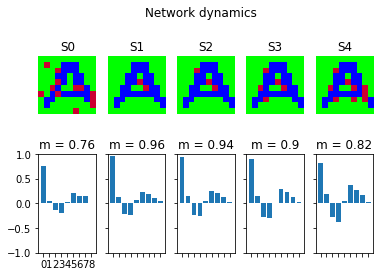

In [50]:
# write your code here
# write your code here
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'D', 'F','S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Explain the discrepancy between the network capacity C (computed above) and your observation. (max 4 lines)
#### [3 points]

# 8.6. Implementing different types of dynamics
### *** Note:*** this exercise is NOT a bonus and it is graded
## 8.6.1. Exercise:
Implement a Hopfield network with asynchronous dynamics (use the function set_dynamics_sign_async()). Store 5 random patterns (take inspiration from exercise 8.3). Fix a noisy initial state, run the network a few times and observe the performance over the different trials.

Parameters: network size=5x5, number of rnd patterns=5, on probability=0.5, number of flips=8.
#### [5 points]

In [16]:
# write your code here

Comment on your results (max 3 lines).
#### [3 points]

## 8.6.2. Stochastic neuron
Implement a synchronous and stochastic neuron. Use the function HopfieldNetwork.set_dynamics_to_user_function() in order to pass _get_sigmoid_update_function(), which you should implement. 

In the stochastic network the dynamics depend on the so-called inverse temperature $\beta$. The temperature in this system can be seen as noise. The activity $S_i(t+1)$ in the next time-step follows the probability distribution: 
\begin{equation}
P\left(S_i(t+1)=1\right) = \frac1{1+\exp\left[-h_i(t)\beta\right]} \qquad \textrm{ where } \qquad h_i(t) = \sum_j w_{ij} S_j(t)
\end{equation}
That is, it is more likely for a neuron $i$ to be set to +1 if its input $h_i$ is higher.

Parameters: network size = 5x5, number of rnd patterns = 5, on probability = 0.5, number of flips = 8, $\beta$=10.

*** Hint 1: *** For inspiration check out the source code of the function _get_sign_update_function()

*** Hint 2: *** In order to implement stochasticity, we suggest to use the python-library numpy.random.

#### [7 points]

In [17]:
# Synchronous stochastic update
def _get_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a synchronous state update using the sigmoid function (h)
    """
    def upd(state_s0, weights):
        
        ???
        
        return s1
    return upd

beta = ???
hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))

SyntaxError: invalid syntax (<ipython-input-17-2344c7918fde>, line 16)

## 8.6.3 Finite temperature
Choose one of the stored patterns (let's say number 1) and flip 10 bits. Then plot the overlap between the network state and this pattern, $m^1$, over time for different values of $\beta$, $\beta\in \left[0.1,2,5,100\right]$.

Parameters: network size = 10x10, number of rnd patterns = 5, on probability = 0.5, number of flips = 10, number of trials = 100, number of steps = 9.

*** Hint 1:***  In order to plot $m^1$ over time, run the script several times and compute the mean  and the standard deviation $\sigma$ of the overlap $m^1$ over trials. You can use the function plt.fill and its parameter $\alpha$ (the transparency), in order to fill with color the area between $+\sigma$ and $-\sigma$.

*** Hint 2: *** Use the function pattern_tools.compute_overlap()

*** Hint 3:*** We suggest to implement and test your code with a smaller network size before getting to the 10x10 units network.
#### [7 points]

In [ ]:
def compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps):
    """ For a given hopfield_net and a pattern_list, initialize it with the init_state and run it
    Compute its overlap with the pattern pattern_list[idx] in time (for nr_steps)
    Repeat the above over many trial (nTrials)
    """
    overlap = np.zeros((nTrials,nr_steps+1))
    
    for i in range(0,nTrials):
        
        # learn patterns
        ???
        
        # run a synch and stoch Hopfield model with the same initial state
        ???
        
        # let the netwrok dynamics evolve
        ???
        states_as_patterns = ???
        
        for i_step in range(len(states_as_patterns)):
            overlap[i,i_step] = ???
    return overlap


# Create the patterns and store them

nTrials = ???
nr_steps= ???
betas = ???

overlap_mean = np.zeros((len(betas), nr_steps+1))
overlap_std = np.zeros((len(betas), nr_steps+1))
for j in range(0, len(betas)):
    
    ???
    
    overlap_mean[j,:] = ???
    overlap_std[j,:] = ???
    
    # Plot
    ???
    
    

Comment on your plot (max 5 lines).
#### [5 points]

write your answer here

## 8.6.4 Asynchronous stochastic neuron
Implement the stochastic neuron of exercise 8.6.2, but with asynchronous update.

*** Hint: *** For help check out the source code of the function _get_async_sign_update_function()
#### [4 points]

In [ ]:
def _get_asynch_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a asynchronous state update using the sigmoid function
    """
    def upd(state_s0, weights):
        random_neuron_idx_list = np.random.permutation(len(state_s0))
        state_s1 = state_s0.copy()
        
        for i in range(len(random_neuron_idx_list)):
            
            ???
            
        return state_s1
    return upd

beta = ???
hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

# 8.7 Energy 

## 8.7.1 Exercise
Set up a deterministic and asynchronous Hopfield network and store 3 random patterns. 

The energy can be defined as $E=-\sum_i^N \sum_j^N w_{ij} S_i S_j$. 

Implement a function that calculates the energy according to the above definition. 

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5.

#### [4 points]

In [ ]:
# Set up your network
???

def energy(weight, state):
    return ???

## 8.7.2 Exercise
Compute the energy of one of the stored patterns: $E (\xi^{\mu})$.

Choose one pattern and gradually flip more and more bits. For that you need to implement a function flip_idx, after checking out the function pattern_tools.flip_n(). How does the energy change and why? (max 3 lines)

*** Hint: *** You can get an intuition by plotting the energy of the state as a function of the number of flipped bits.
#### [1 + 6 + 4 points]

In [ ]:
nr_flips = np.arange(0,10,1)
energy_flips = np.zeros(len(nr_flips))

for i in range(len(nr_flips)):
    
    ???
    
    e_flips[i] = ???
    
# Plot
???

your answer

## 8.7.3 Question.
Compute the energy of the reverse of one of the stored patterns $E(-\xi^1)$. What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines) 
#### [1 + 3 points]

## 8.7.4 Exercise.
1 - Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$ and run the dynamics. What is the energy of this state?

Parameters: number steps = 4.

#### [2 points]

In [ ]:
# write your code here

2 - Consider the ensemble of all states that differ from $S_0$ in exactly one flip. Initialize the network in each of those states and check what is the final state of the dynamical evolution.

*** Hint: *** Compare the final states with $S_0$.
#### [8 points]

In [ ]:
# Function to flip one neuron
def flip_idx(template, idx):
    """
    makes a copy of the template pattern and flips the idx-th state.
    Args:
        template:
        nr_of_flips:
    Returns:
        a new pattern
    """
    ???
    return ???


# Flip all neurons one after the other
for i in range(0, pattern_size**2):
    
    s_0_flipped = flip_idx(s_0, i)
    
    ???

3 - What can you tell about the stability of $S_0$? Briefly comment (max 5 lines). 

***Hint:*** For help, refer to the pdf on associative memory on the MOODLE (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf).

#### [6 points]

your answer

## 8.7.5 Question.
Does your argumentation above hold in the case of $S_0 = sgn(\sum_{\mu}^2 \xi^{\mu})$? Why? (max 3 lines)
#### [3 points]

## 8.7.6 Exercise.
Use now the stochastic neuron with asynchronous update you implemented in 8.6.4. Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$. For $\beta$ varying in $\beta\in \left[1,2,8,10,100\right]$, plot the overlap of the network initialized with $S_0$ with each of the 3 stored patterns as a function of time. 

What do you observe? Comment on the stability of the spurious state $S_0$ in each case. (max 4 lines)

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5, number of steps = 9.

*** Hint 1: *** Make 4 plots (or 1 plot with 4 subplots), one for each value of $\beta$.

*** Hint 2: *** You can use the function pattern_tools.compute_overlap_list (or pattern_tools.compute_overlap).
#### [5 + 4 points]

In [ ]:
???

for j in range(0, len(betas)):
    
    
    ???
    
    
    # Compute
    
    
    # Plot

your answer